In [1]:
pip install selenium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [118]:
# import all the required libraries which are used for the webscraping.
# i haved used BeautifulSoup for the BeautifulSoup.
import requests
from bs4 import BeautifulSoup
import re

import numpy as np
import pandas as pd

from selenium import webdriver

import time

import warnings
warnings.filterwarnings('ignore')

In [4]:
# request 

page = requests.get('https://www.bikewale.com/used/bikes-in-mumbai/')

In [5]:
page

<Response [200]>

In [6]:
url='https://www.bikewale.com/used/bikes-in-hyderabad/#'
driver = webdriver.Chrome(r'C:\Drivers\chromedriver_win32\chromedriver.exe')
driver.get(url)

In [7]:
soup = BeautifulSoup(driver.page_source,'html.parser')
driver.close()

# data extraction

In [8]:
all_bikes = soup.find_all("div",attrs = {'id':'usedBikeContent'})
print(url)

https://www.bikewale.com/used/bikes-in-hyderabad/#


In [9]:

# Extracting the columns and rows for the website one-by-one.

soup.find_all("a",class_="text-truncate text-black")[0].text

'2020, Suzuki Access 125 Special Edition - Disc '

In [10]:
# Here we are extacting the price of the bike from the bikewale website.

price = []
for soup in all_bikes:
    i = soup.find_all("span",class_="font22 text-bold")[0]
    price.append(i.text)

In [11]:

# Here we are extracting the brand of the bike from the bikewale website.

brand = []
for soup in all_bikes:
    i = soup.find_all("a",class_="text-truncate text-black")[0]
    brand.append(i.text.split()[1])

In [12]:
# Here we are extracting the sub_brand of the bike from the bikewale website.

sub_brand = []
for soup in all_bikes:
    i = soup.find_all("a",class_="text-truncate text-black")[0]
    sub_brand.append(i.text.split()[2])

In [13]:
# Extraction the location column from the website.

location = []
for soup in all_bikes:
    i = soup.find_all("span",class_="model-details-label")[3]
    location.append(i.text)

In [14]:
# Here we are exracting the owner of the bike like 1st owner,2nd owner and 3rd owner.

owner =[]
for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[2]
        owner.append(i.text.split()[0])

In [15]:
# Here we are extracting the kms of the bike from the bikewale website.

kms =[]
for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[1]
        kms.append(i.text.split()[0])

In [16]:
# Here we are extracting the cc of the bike from the bikewale website.

cc = []
for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        a = i.text.split()
        b =' '.join(a)
        c = re.findall(r'\s\d{3}\s',b)
        if c:
            cc.append(c[0])
        else:
            cc.append(np.nan)

In [17]:
# writing the code to extract the data for the choosen cities and i have choosen hyderabad,mumbai,bangalore and pune.
# Taking all the codes related for this and created in the one cell using for loop extract the data for one by one city.
# Extracting the data from the hyderabad city.

model = []
price = []
kms = []
owner = []
location = []
brand = []
sub_brand = []
cc = []

# creating a for loop to get data from all the pages in the hyderbad city.
# Checking the page source code and for extracing here we are using selenium and beautifulsoup.

for x in range(1,11): 
    url = f'https://www.bikewale.com/used/bikes-in-hyderabad/#pn={x}'
    driver = webdriver.Chrome(r'C:\Drivers\chromedriver_win32\chromedriver.exe')# chrome driver path
    driver.get(url)# inspecting the url
    
    time.sleep(3)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    driver.close()
    
# this is the tag and id of the entire page.
    all_bikes = soup.find_all("div",attrs = {'id':'usedBikeContent'})
    print(url)

# Here we are extracting the model of the bike manufactured.
# Appending model=[] above
    
    for soup in all_bikes:
        i = soup.find("span",attrs = {'class':"model-details-label"})
        model.append(i.text.split()[0])
        
# This the code to extarct the price of the bikes.
# Appending price = [] above

    for soup in all_bikes:
        i = soup.find_all("span",class_="font22 text-bold")[0]
        price.append(i.text)
        
# This the code to extarct the kilometers driven of the bikes.
# Appending kms = [] above        

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[1]
        kms.append(i.text.split()[0])
        
# This the code to extarct the owner of the bikes.
# Appending owner = [] above
    
    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[2]
        owner.append(i.text.split()[0])
        
# This the code to extarct the location of the bikes.
# Appending location = [] above        
        
    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[3]
        location.append(i.text)
            
# This the code to extarct the brand of the bikes from the website.
# Appending brand = [] above

    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        brand.append(i.text.split()[1])
        
# This the code to extarct the sub_brand of the bikes from the website.
# Appending sub_brand = [] above        
    
    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        sub_brand.append(i.text.split()[2])
        
# code to extract the cc of the bikes in the website.
# In this code regex(regular expressions) are also used to get reqiured data.
# Appending cc = [] above

    for soup in all_bikes:
            i = soup.find_all("a",class_="text-truncate text-black")[0]
            a = i.text.split()
            b =' '.join(a)
            c = re.findall(r'\s\d{3}\s',b)
            if c:
                cc.append(c[0])
            else:
                cc.append(np.nan)

https://www.bikewale.com/used/bikes-in-hyderabad/#pn=1
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=2
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=3
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=4
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=5
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=6
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=7
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=8
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=9
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=10


In [18]:
dict1 = {
    "brand":brand,
    "sub_brand":sub_brand,
    "model":model,
    "owner":owner,
    "kms":kms,
    "price":price,
    "cc":cc,
    "location":location
    
}

In [19]:
df1 = pd.DataFrame(dict1)
df1

,brand,sub_brand,model,owner,kms,price,cc,location
0,Suzuki,Access,2020,1st,"8,500","70,000",125,Hyderabad
1,Bajaj,Pulsar,2020,2nd,"23,000","85,000",150,Hyderabad
2,Bajaj,Pulsar,2020,2nd,"23,000","85,000",150,Hyderabad
3,Yamaha,Fascino,2016,1st,"70,000","25,000",110,Hyderabad
4,Hero,Splendor,2016,1st,"30,000","50,000",NaN,Hyderabad
...,...,...,...,...,...,...,...,...
195,Vespa,S,2015,1st,"50,000","40,000",NaN,Hyderabad
196,Suzuki,Access,2021,1st,"14,000","80,000",125,Hyderabad
197,Hero,CBZ,2011,1st,"44,000","40,000",NaN,Hyderabad
198,Hero,Passion,2019,2nd,"21,000","55,000",NaN,Hyderabad


In [20]:
# Checking the length of the each column.
# checking the len of the all the columns are matched.

len(model)
len(price)
len(kms)
len(owner)
len(location)
len(brand)
len(sub_brand)
len(cc)

200

200

200

200

200

200

200

200

In [21]:
# Data Extraction for Banglore Location.

In [22]:
model = []
price = []
kms = []
owner = []
location = []
brand = []
sub_brand = []
cc = []

for x in range(1,6): 
    url = f'https://www.bikewale.com/used/bikes-in-bangalore/#pn={x}'
    driver = webdriver.Chrome(r'C:\Drivers\chromedriver_win32\chromedriver.exe')
    driver.get(url)

    time.sleep(3)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    driver.close()

    all_bikes = soup.find_all("div",attrs = {'id':'usedBikeContent'})
    print(url)

    for soup in all_bikes:
        i = soup.find("span",attrs = {'class':"model-details-label"})
        model.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="font22 text-bold")[0]
        price.append(i.text)

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[1]
        kms.append(i.text.split()[0])


    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[2]
        owner.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[3]
        location.append(i.text)

    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        brand.append(i.text.split()[1])


    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        sub_brand.append(i.text.split()[2])
        
    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        a = i.text.split()
        b =' '.join(a)
        c = re.findall(r'\s\d{3}\s',b)
        if c:
            cc.append(c[0])
        else:
            cc.append(np.nan)

https://www.bikewale.com/used/bikes-in-bangalore/#pn=1
https://www.bikewale.com/used/bikes-in-bangalore/#pn=2
https://www.bikewale.com/used/bikes-in-bangalore/#pn=3
https://www.bikewale.com/used/bikes-in-bangalore/#pn=4
https://www.bikewale.com/used/bikes-in-bangalore/#pn=5


In [23]:

len(model)
len(price)
len(kms)
len(owner)
len(location)
len(brand)
len(sub_brand)
len(cc)
360

100

100

100

100

100

100

100

100

360

In [24]:
# Creating the dictionary as (dict2) for the extarcted columns we have needed from the bangalore location.
# Assingning the colunms names before creating the DataFrame.

dict2 = {
    "brand":brand,
    "sub_brand":sub_brand,
    "model":model,
    "owner":owner,
    "kms":kms,
    "price":price,
    "cc":cc,
    "location":location,
}

In [25]:
# Converting the dict2 into DataFrame using pandas.
# Storing in a variable named as df2 and checking the rows and coulmns.

df2 = pd.DataFrame(dict2)
df2

,brand,sub_brand,model,owner,kms,price,cc,location
0,Royal,Enfield,2015,1st,"29,000","1,30,000",350,Bangalore
1,TVS,Ntorq,2018,1st,"27,500","60,000",125,Bangalore
2,Royal,Enfield,2017,1st,"30,000","1,20,000",350,Bangalore
3,Yamaha,YZF,2016,1st,"38,000","1,15,000",NaN,Bangalore
4,Bajaj,Pulsar,2011,1st,"34,000","50,000",220,Bangalore
...,...,...,...,...,...,...,...,...
95,Honda,Dio,2011,1st,"54,000","26,000",NaN,Bangalore
96,Hero,Splendor,2012,1st,"30,000","40,000",NaN,Bangalore
97,Honda,CB,2017,1st,"40,000","50,000",NaN,Bangalore
98,Yamaha,FZ25,2017,2nd,"20,000","75,000",NaN,Bangalore


In [26]:
# Data Extraction Mumbai Location

In [27]:
model = []
price = []
kms = []
owner = []
location = []
brand = []
sub_brand = []
cc = []

for x in range(1,7): 
    url = f'https://www.bikewale.com/used/bikes-in-mumbai/#pn={x}'
    driver = webdriver.Chrome(r'C:\Drivers\chromedriver_win32\chromedriver.exe')
    driver.get(url)

    time.sleep(3)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    driver.close()

    all_bikes = soup.find_all("div",attrs = {'id':'usedBikeContent'})
    print(url)

    for soup in all_bikes:
        i = soup.find("span",attrs = {'class':"model-details-label"})
        model.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="font22 text-bold")[0]
        price.append(i.text)

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[1]
        kms.append(i.text.split()[0])


    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[2]
        owner.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[3]
        location.append(i.text)

    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        brand.append(i.text.split()[1])


    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        sub_brand.append(i.text.split()[2])
        
    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        a = i.text.split()
        b =' '.join(a)
        c = re.findall(r'\s\d{3}\s',b)
        if c:
            cc.append(c[0])
        else:
            cc.append(np.nan)

https://www.bikewale.com/used/bikes-in-mumbai/#pn=1
https://www.bikewale.com/used/bikes-in-mumbai/#pn=2
https://www.bikewale.com/used/bikes-in-mumbai/#pn=3
https://www.bikewale.com/used/bikes-in-mumbai/#pn=4
https://www.bikewale.com/used/bikes-in-mumbai/#pn=5
https://www.bikewale.com/used/bikes-in-mumbai/#pn=6


In [28]:
len(model)
len(price)
len(kms)
len(owner)
len(location)
len(brand)
len(sub_brand)
len(cc)

120

120

120

120

120

120

120

120

In [29]:
# Creating the dictionary as (dict3) for the extarcted columns we have needed from the mumbai location.
# Assingning the colunms names before creating the DataFrame.

dict3 = {
    "brand":brand,
    "sub_brand":sub_brand,
    "model":model,
    "owner":owner,
    "kms":kms,
    "price":price,
    "cc":cc,
    "location":location}

In [30]:

# Converting the dict3 into DataFrame using pandas.
# Storing in a variable named as df3 and checking the rows and coulmns.

df3 = pd.DataFrame(dict3)
df3


,brand,sub_brand,model,owner,kms,price,cc,location
0,Triumph,Tiger,2015,2nd,"12,500","12,00,000",800,Mumbai
1,Bajaj,Avenger,2017,1st,"7,848","60,000",220,Mumbai
2,Hero,Xtreme,2021,1st,"16,660","1,00,000",100,Mumbai
3,Yamaha,Fazer,2019,1st,"29,500","1,25,000",NaN,Mumbai
4,Kawasaki,Ninja,2019,1st,"45,500","2,50,000",300,Mumbai
...,...,...,...,...,...,...,...,...
115,Bajaj,Pulsar,2013,1st,"61,000","35,000",220,Mumbai
116,Honda,CB,2011,1st,"50,000","30,000",NaN,Mumbai
117,Honda,CB,2010,1st,"50,000","50,000",NaN,Mumbai
118,Royal,Enfield,2014,1st,"25,000","1,10,000",350,Mumbai


In [31]:
# Extracting data pune location

In [32]:
model = []
price = []
kms = []
owner = []
location = []
brand = []
sub_brand = []
cc = []

for x in range(1,8): 
    url = f'https://www.bikewale.com/used/bikes-in-pune/#pn={x}'
    driver = webdriver.Chrome(r'C:\Drivers\chromedriver_win32\chromedriver.exe')
    driver.get(url)

    time.sleep(3)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    driver.close()

    all_bikes = soup.find_all("div",attrs = {'id':'usedBikeContent'})
    print(url)

    for soup in all_bikes:
        i = soup.find("span",attrs = {'class':"model-details-label"})
        model.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="font22 text-bold")[0]
        price.append(i.text)

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[1]
        kms.append(i.text.split()[0])


    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[2]
        owner.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[3]
        location.append(i.text)

    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        brand.append(i.text.split()[1])


    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        sub_brand.append(i.text.split()[2])
        
    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        a = i.text.split()
        b =' '.join(a)
        c = re.findall(r'\s\d{3}\s',b)
        if c:
            cc.append(c[0])
        else:
            cc.append(np.nan)

https://www.bikewale.com/used/bikes-in-pune/#pn=1
https://www.bikewale.com/used/bikes-in-pune/#pn=2
https://www.bikewale.com/used/bikes-in-pune/#pn=3
https://www.bikewale.com/used/bikes-in-pune/#pn=4
https://www.bikewale.com/used/bikes-in-pune/#pn=5
https://www.bikewale.com/used/bikes-in-pune/#pn=6
https://www.bikewale.com/used/bikes-in-pune/#pn=7


In [33]:
len(model)
len(price)
len(kms)
len(owner)
len(location)
len(brand)
len(sub_brand)
len(cc)

140

140

140

140

140

140

140

140

In [34]:
# Creating the dictionary as (dict4) for the extarcted columns we have needed from the pune location.
# Assingning the colunms names before creating the DataFrame.

dict4 = {
    "brand":brand,
    "sub_brand":sub_brand,
    "model":model,
    "owner":owner,
    "kms":kms,
    "price":price,
    "cc":cc,
    "location":location
    
}

In [35]:

# Converting 
# Converting the dict4 into DataFrame using pandas.
# Storing in a variable named as df4 and checking the rows and coulmns.

df4 = pd.DataFrame(dict4)
df4

,brand,sub_brand,model,owner,kms,price,cc,location
0,Honda,Aviator,2017,1st,"23,000","37,000",NaN,Pune
1,Honda,Activa,2012,1st,"43,000","30,000",NaN,Pune
2,Bajaj,Pulsar,2006,1st,"30,000","20,000",150,Pune
3,Honda,CBF,2009,1st,"81,000","15,000",NaN,Pune
4,TVS,Apache,2018,1st,"29,500","75,000",160,Pune
...,...,...,...,...,...,...,...,...
135,Honda,Dio,2009,2nd,"50,000","22,000",NaN,Pune
136,TVS,Apache,2022,1st,"3,000","1,40,000",160,Pune
137,Jawa,42,2020,1st,"3,150","1,69,000",NaN,Pune
138,Hero,Karizma,2010,1st,"20,000","50,000",NaN,Pune


In [36]:
# Extracting data chennai Location.

In [37]:
model = []
price = []
kms = []
owner = []
location = []
brand = []
sub_brand = []
cc = []

for x in range(1,8): 
    url = f'https://www.bikewale.com/used/bikes-in-Chennai/#pn={x}'
    driver = webdriver.Chrome(r'C:\Drivers\chromedriver_win32\chromedriver.exe')
    driver.get(url)

    time.sleep(3)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    driver.close()

    all_bikes = soup.find_all("div",attrs = {'id':'usedBikeContent'})
    print(url)

    for soup in all_bikes:
        i = soup.find("span",attrs = {'class':"model-details-label"})
        model.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="font22 text-bold")[0]
        price.append(i.text)

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[1]
        kms.append(i.text.split()[0])


    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[2]
        owner.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[3]
        location.append(i.text)

    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        brand.append(i.text.split()[1])


    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        sub_brand.append(i.text.split()[2])
        
    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        a = i.text.split()
        b =' '.join(a)
        c = re.findall(r'\s\d{3}\s',b)
        if c:
            cc.append(c[0])
        else:
            cc.append(np.nan)

https://www.bikewale.com/used/bikes-in-Chennai/#pn=1
https://www.bikewale.com/used/bikes-in-Chennai/#pn=2
https://www.bikewale.com/used/bikes-in-Chennai/#pn=3
https://www.bikewale.com/used/bikes-in-Chennai/#pn=4
https://www.bikewale.com/used/bikes-in-Chennai/#pn=5
https://www.bikewale.com/used/bikes-in-Chennai/#pn=6
https://www.bikewale.com/used/bikes-in-Chennai/#pn=7


In [38]:
len(model)
len(price)
len(kms)
len(owner)
len(location)
len(brand)
len(sub_brand)
len(cc)

136

136

136

136

136

136

136

136

In [39]:
# Creating the dictionary as (dict5) for the extarcted columns we have needed from the pune location.
# Assingning the colunms names before creating the DataFrame.

dict5 = {
    "brand":brand,
    "sub_brand":sub_brand,
    "model":model,
    "owner":owner,
    "kms":kms,
    "price":price,
    "cc":cc,
    "location":location,
}

In [40]:
# Converting the dict5 into DataFrame using pandas.
# Storing in a variable named as df5 and checking the rows and coulmns.

df5 = pd.DataFrame(dict5)
df5

,brand,sub_brand,model,owner,kms,price,cc,location
0,Hero,Xpulse,2022,1st,"1,300","1,55,000",200,Chennai
1,Hero,Passion,2020,1st,"30,000","60,000",NaN,Chennai
2,TVS,XL,2010,2nd,"35,000","7,000",NaN,Chennai
3,Honda,Dream,2012,2nd,"78,000","25,000",NaN,Chennai
4,TVS,Sport,2017,1st,"77,000","25,000",NaN,Chennai
...,...,...,...,...,...,...,...,...
131,Bajaj,Pulsar,2017,1st,"30,000","70,000",NaN,Chennai
132,Hero,Pleasure,2013,1st,"56,760","18,500",NaN,Chennai
133,Hero,Honda,2007,2nd,"60,000","20,000",NaN,Chennai
134,Yamaha,Fazer,2011,1st,"30,000","38,000",NaN,Chennai


In [41]:
final_df = pd.concat([df1,df2,df3,df4,df5],axis=0)
final_df

,brand,sub_brand,model,owner,kms,price,cc,location
0,Suzuki,Access,2020,1st,"8,500","70,000",125,Hyderabad
1,Bajaj,Pulsar,2020,2nd,"23,000","85,000",150,Hyderabad
2,Bajaj,Pulsar,2020,2nd,"23,000","85,000",150,Hyderabad
3,Yamaha,Fascino,2016,1st,"70,000","25,000",110,Hyderabad
4,Hero,Splendor,2016,1st,"30,000","50,000",NaN,Hyderabad
...,...,...,...,...,...,...,...,...
131,Bajaj,Pulsar,2017,1st,"30,000","70,000",NaN,Chennai
132,Hero,Pleasure,2013,1st,"56,760","18,500",NaN,Chennai
133,Hero,Honda,2007,2nd,"60,000","20,000",NaN,Chennai
134,Yamaha,Fazer,2011,1st,"30,000","38,000",NaN,Chennai


In [42]:
# Converting the final_df(final data frame) to csv file.
# Here we can save into different files like we can convert it to.excel,
# .tsv(tabs separated values),.csv(comma separated values).
# using df.to_csv(dfname.csv)

final_df.to_csv('Web_Scraping_Project using selenium.csv')

In [43]:
pwd

'C:\\Users\\Ravi Kumar\\Downloads\\Batch no 197'

In [44]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# for HD visualizations
%config InlineBackend.figure_format='retina'

In [45]:
# Loading the Dataset for the cleaning purpose.

bike_df = pd.read_csv(r"C:\Users\Ravi Kumar\Downloads\Batch no 197\Web_Scraping_Project using selenium.csv")

In [46]:
# Inspecting the Data and Checking the properties of the DataFrame.

bike_df
bike_df.shape

,Unnamed: 0,brand,sub_brand,model,owner,kms,price,cc,location
0,0,Suzuki,Access,2020,1st,"8,500","70,000",125.0,Hyderabad
1,1,Bajaj,Pulsar,2020,2nd,"23,000","85,000",150.0,Hyderabad
2,2,Bajaj,Pulsar,2020,2nd,"23,000","85,000",150.0,Hyderabad
3,3,Yamaha,Fascino,2016,1st,"70,000","25,000",110.0,Hyderabad
4,4,Hero,Splendor,2016,1st,"30,000","50,000",NaN,Hyderabad
...,...,...,...,...,...,...,...,...,...
691,131,Bajaj,Pulsar,2017,1st,"30,000","70,000",NaN,Chennai
692,132,Hero,Pleasure,2013,1st,"56,760","18,500",NaN,Chennai
693,133,Hero,Honda,2007,2nd,"60,000","20,000",NaN,Chennai
694,134,Yamaha,Fazer,2011,1st,"30,000","38,000",NaN,Chennai


(696, 9)

In [47]:
# Renaming the columns of the DataFrame.
bike_df.rename(columns={'kms' : 'kms_driven',
                      'model':'model_year'}, inplace = True)

In [48]:
# Checking the info() and describe() of the DataFrame.

bike_df.info()
bike_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  696 non-null    int64  
 1   brand       696 non-null    object 
 2   sub_brand   696 non-null    object 
 3   model_year  696 non-null    int64  
 4   owner       696 non-null    object 
 5   kms_driven  696 non-null    object 
 6   price       696 non-null    object 
 7   cc          295 non-null    float64
 8   location    696 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 49.1+ KB


,Unnamed: 0,model_year,cc
count,696.000000,696.000000,295.000000
mean,73.132184,2016.107759,245.037288
std,47.310270,4.598548,139.163934
min,0.000000,1988.000000,100.000000
25%,34.000000,2014.000000,150.000000
50%,69.000000,2017.000000,200.000000
75%,105.000000,2019.000000,350.000000
max,199.000000,2022.000000,800.000000


# Data Cleaning

In [49]:
# Converting the dtypes of the each column to actual dtype or required dtype.

bike_df.brand = bike_df.brand.astype('category')
bike_df.sub_brand = bike_df.sub_brand.astype('category')
bike_df.owner = bike_df.owner.replace('1st', '1').replace('2nd','2').replace('3rd','3').replace("4th","4").astype('category')
bike_df.location = bike_df.location.astype('category')
bike_df.model_year = bike_df.model_year.astype('category')
bike_df.kms_driven = bike_df.kms_driven.str.replace(',', '').astype('int64')
bike_df.price = bike_df.price.str.replace(',', '').astype('int64')

In [50]:
# checking the info() whether the dtypes are changed are not.

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  696 non-null    int64   
 1   brand       696 non-null    category
 2   sub_brand   696 non-null    category
 3   model_year  696 non-null    category
 4   owner       696 non-null    category
 5   kms_driven  696 non-null    int64   
 6   price       696 non-null    int64   
 7   cc          295 non-null    float64 
 8   location    696 non-null    category
dtypes: category(5), float64(1), int64(3)
memory usage: 33.2 KB


In [51]:
# Checking the DataFrame if any duplicates are present are not.
bike_df.duplicated()
bike_df.duplicated().value_counts()

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Length: 696, dtype: bool

False    696
dtype: int64

In [52]:
# Identifying the Missing Values.

bike_df.isna()
bike_df.isna().sum()

,Unnamed: 0,brand,sub_brand,model_year,owner,kms_driven,price,cc,location
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
691,False,False,False,False,False,False,False,True,False
692,False,False,False,False,False,False,False,True,False
693,False,False,False,False,False,False,False,True,False
694,False,False,False,False,False,False,False,True,False


Unnamed: 0      0
brand           0
sub_brand       0
model_year      0
owner           0
kms_driven      0
price           0
cc            401
location        0
dtype: int64

In [53]:
# go for this approach if more than 50% of the column data is missing.
# removing the (whole cc column) because here we have 586 null values it is more than 50% containing missing values.
# Checking the percentage of missing values.

# total number of missing records
np.sum(bike_df.isna().sum())

# Shape of the bike_df
bike_df.shape

# Percentage of total missing rows in DF and in cc column we have missing data.
np.round(np.sum(bike_df.isna().sum())/len(bike_df)*100,2).astype(str) + '%'

401

(696, 9)

'57.61%'

In [54]:
# Droping the cc column because the we have 57.45% percentage of missing data.

bike_df.drop(['cc','Unnamed: 0'],axis = 1, inplace = True)

In [55]:
# Checking the missing values again and columns also.
# Checking or identifying for the corrupted data.

bike_df.info()

bike_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   brand       696 non-null    category
 1   sub_brand   696 non-null    category
 2   model_year  696 non-null    category
 3   owner       696 non-null    category
 4   kms_driven  696 non-null    int64   
 5   price       696 non-null    int64   
 6   location    696 non-null    category
dtypes: category(5), int64(2)
memory usage: 22.3 KB


brand         0
sub_brand     0
model_year    0
owner         0
kms_driven    0
price         0
location      0
dtype: int64

In [56]:
# Checking the Descriptive statistics

bike_df.describe(include = 'all')

,brand,sub_brand,model_year,owner,kms_driven,price,location
count,696,696,696.0,696,696.000000,6.960000e+02,696
unique,26,116,26.0,5,NaN,NaN,5
top,Honda,Enfield,2018.0,1,NaN,NaN,Hyderabad
freq,128,85,78.0,603,NaN,NaN,200
mean,NaN,NaN,NaN,NaN,34484.774425,1.024307e+05,NaN
std,NaN,NaN,NaN,NaN,54577.302918,1.292942e+05,NaN
min,NaN,NaN,NaN,NaN,74.000000,7.000000e+03,NaN
25%,NaN,NaN,NaN,NaN,12500.000000,4.300000e+04,NaN
50%,NaN,NaN,NaN,NaN,25000.000000,7.000000e+04,NaN
75%,NaN,NaN,NaN,NaN,42000.000000,1.250000e+05,NaN


In [57]:
bike_df

,brand,sub_brand,model_year,owner,kms_driven,price,location
0,Suzuki,Access,2020,1,8500,70000,Hyderabad
1,Bajaj,Pulsar,2020,2,23000,85000,Hyderabad
2,Bajaj,Pulsar,2020,2,23000,85000,Hyderabad
3,Yamaha,Fascino,2016,1,70000,25000,Hyderabad
4,Hero,Splendor,2016,1,30000,50000,Hyderabad
...,...,...,...,...,...,...,...
691,Bajaj,Pulsar,2017,1,30000,70000,Chennai
692,Hero,Pleasure,2013,1,56760,18500,Chennai
693,Hero,Honda,2007,2,60000,20000,Chennai
694,Yamaha,Fazer,2011,1,30000,38000,Chennai


In [58]:
# Convert to .csv
bike_df.to_csv('bike_df_data',index=False)


In [59]:
# Importing the cleaned DataFrame to do further process.
bike_cleaned = pd.read_csv(r"C:\Users\Ravi Kumar\Downloads\Batch no 197\bike_df_data")

In [60]:
bike_cleaned.brand = bike_cleaned.brand.astype('category')
bike_cleaned.sub_brand = bike_cleaned.sub_brand.astype('category')
bike_cleaned.owner = bike_cleaned.owner.astype('category')
bike_cleaned.location = bike_cleaned.location.astype('category')
bike_cleaned.model_year = bike_cleaned.model_year.astype('category')
bike_cleaned.kms_driven = bike_cleaned.kms_driven.astype('int64')
bike_cleaned.price = bike_cleaned.price.astype('int64')

In [61]:

bike_cleaned
bike_cleaned.info()

,brand,sub_brand,model_year,owner,kms_driven,price,location
0,Suzuki,Access,2020,1,8500,70000,Hyderabad
1,Bajaj,Pulsar,2020,2,23000,85000,Hyderabad
2,Bajaj,Pulsar,2020,2,23000,85000,Hyderabad
3,Yamaha,Fascino,2016,1,70000,25000,Hyderabad
4,Hero,Splendor,2016,1,30000,50000,Hyderabad
...,...,...,...,...,...,...,...
691,Bajaj,Pulsar,2017,1,30000,70000,Chennai
692,Hero,Pleasure,2013,1,56760,18500,Chennai
693,Hero,Honda,2007,2,60000,20000,Chennai
694,Yamaha,Fazer,2011,1,30000,38000,Chennai


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   brand       696 non-null    category
 1   sub_brand   696 non-null    category
 2   model_year  696 non-null    category
 3   owner       696 non-null    category
 4   kms_driven  696 non-null    int64   
 5   price       696 non-null    int64   
 6   location    696 non-null    category
dtypes: category(5), int64(2)
memory usage: 22.3 KB


In [62]:
pip install sidetable

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [63]:
# Importing the sidetable library to bulit the frequency table for the brand column.
# To check which brand is most repeated brand.

import sidetable

bike_cleaned.stb.freq(['brand'])

,brand,count,percent,cumulative_count,cumulative_percent
0,Honda,128,18.390805,128,18.390805
1,Bajaj,127,18.247126,255,36.637931
2,Hero,88,12.643678,343,49.281609
3,Yamaha,86,12.356322,429,61.637931
4,Royal,85,12.212644,514,73.850575
5,TVS,67,9.626437,581,83.477011
6,Suzuki,29,4.166667,610,87.643678
7,KTM,19,2.729885,629,90.373563
8,Jawa,14,2.011494,643,92.385057
9,Benelli,9,1.293103,652,93.678161


In [64]:
# Showing the count of number of brands,sub_brand,model by brands.
# showing using groupby concept.

#bike_cleaned.groupby(['brand','sub_brand','price'])['brand'].count()

In [65]:
# Showing the Descriptive statistics of the DataFrame

bike_cleaned.count()
bike_cleaned.mean()
bike_cleaned.median()

brand         696
sub_brand     696
model_year    696
owner         696
kms_driven    696
price         696
location      696
dtype: int64

kms_driven     34484.774425
price         102430.742816
dtype: float64

kms_driven    25000.0
price         70000.0
dtype: float64

In [66]:
# applying statistical functions on DF

bike_cleaned.mode()

bike_cleaned.skew()
bike_cleaned.kurt()

,brand,sub_brand,model_year,owner,kms_driven,price,location
0,Honda,Enfield,2018,1,30000,40000,Hyderabad


kms_driven    8.834753
price         7.817019
dtype: float64

kms_driven    98.796210
price         96.071406
dtype: float64

# identifying the outliers

In [67]:
# outerliers can be identified using boxplot method and z-score method.
# Checking the outliers using the boxplot method.
# 1. Price Column:

Q1,Q2,Q3 = tuple(bike_cleaned.price.quantile(q=[0.25,0.50,0.75]).values)

# Checking the missing values

print(Q1,Q2,Q3)

43000.0 70000.0 125000.0


In [68]:
# Calculating the IQR value and for calculating the LL and UL.
IQR = Q3-Q1

# Checking the outliers in lowerlimit(LL).`
UL = Q3+1.5*IQR

# Checking the outliers in upperlimit(UL)
LL = Q1-1.5*IQR

print(IQR,UL,LL)

82000.0 248000.0 -80000.0


In [69]:
# This are not outliers but those are failing in outliers.
# This are premium bikes in bikewale website. 

bike_cleaned[(bike_cleaned.price < LL) | (bike_cleaned.price > UL)]

,brand,sub_brand,model_year,owner,kms_driven,price,location
6,Royal,Enfield,2019,1,11000,250000,Hyderabad
21,Kawasaki,Ninja,2022,1,290,755000,Hyderabad
51,BMW,G,2021,1,18000,250000,Hyderabad
52,Royal,Enfield,2021,1,1130,350000,Hyderabad
71,BMW,G,2021,1,1500,320000,Hyderabad
76,BMW,G,2021,1,18000,260000,Hyderabad
90,Royal,Enfield,2020,1,15000,310000,Hyderabad
105,KTM,RC,2020,1,2574,250000,Hyderabad
123,Royal,Enfield,2019,1,13000,280000,Hyderabad
152,Jawa,42,2022,1,850,300000,Hyderabad


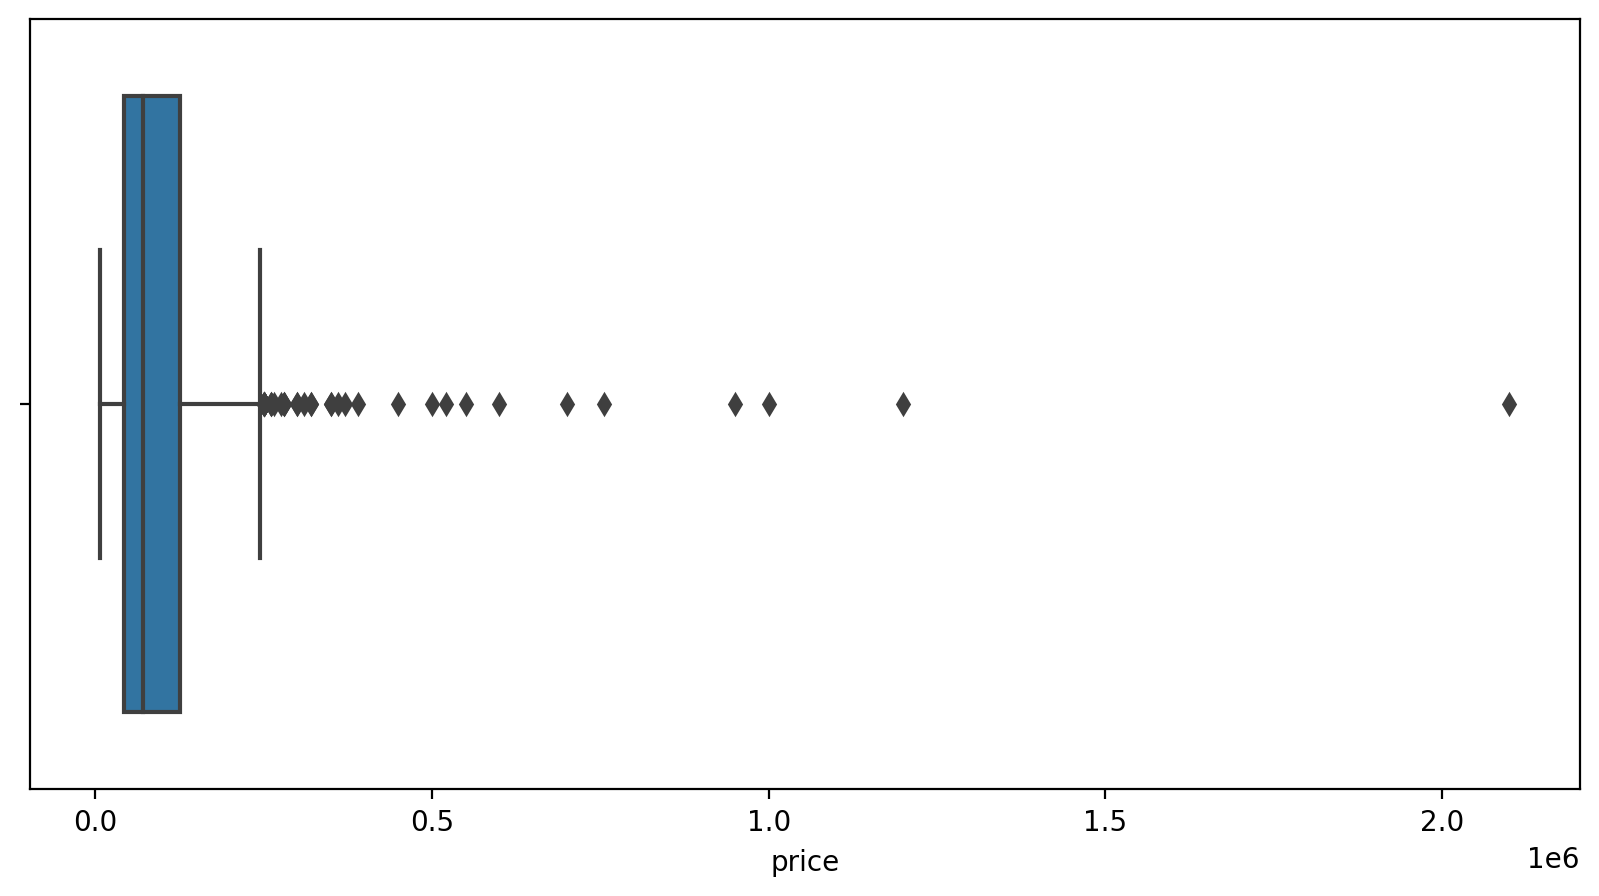

In [70]:
# Showing the outliers by boxplot for price column.
plt.figure(figsize=(10,5))

sns.boxplot(bike_cleaned.price,orient = "h" );

In [71]:
# 2. kilometers Column:
Q4,Q5,Q6 = tuple(bike_cleaned.kms_driven.quantile(q=[0.25,0.50,0.75]).values)

# Checking the missing values
print(Q4,Q5,Q6)

12500.0 25000.0 42000.0


In [72]:
# Calculating the IQR value and for calculating the LL and UL.
IQR_kms = Q6-Q4

# Checking the outliers in lowerlimit(LL).
UL_kms = Q6+1.5*IQR

# Checking the outliers in upperlimit(UL)
LL_kms = Q4-1.5*IQR

print(IQR_kms,UL_kms,LL_kms)

29500.0 165000.0 -110500.0


In [73]:
# This are the outliers in the kms column.
# There are six outliers in this kms column.

bike_cleaned[(bike_cleaned.kms_driven > UL_kms) | (bike_cleaned.kms_driven < LL_kms)]

,brand,sub_brand,model_year,owner,kms_driven,price,location
110,KTM,200,2013,2,380000,80000,Hyderabad
112,Honda,CB,2013,1,750000,40000,Hyderabad
240,Honda,CBF,2012,4,668022,40000,Bangalore
308,Hero,Honda,2008,1,672220,12000,Mumbai
320,Bajaj,Discover,2015,1,300000,31000,Mumbai
361,Hero,Maestro,2016,1,350000,30000,Mumbai
392,Honda,Activa,2014,1,248438,30000,Mumbai
497,Bajaj,Pulsar,2011,1,220000,32000,Pune
676,Bajaj,Pulsar,2008,1,200000,10000,Chennai


In [74]:
# Droped the outliers in the kms column.
# converting to index than to list and storing it in to an variable named as drop_list
drop_list = bike_cleaned[(bike_cleaned.kms_driven > UL_kms) | (bike_cleaned.kms_driven < LL_kms)].index.tolist()
# this code also works for drop the outliers.
bike_cleaned.drop(drop_list,axis= 0, inplace = True)

In [75]:
# After Droping the columns resetting the index using reset_index()
bike_cleaned = bike_cleaned.reset_index()

In [76]:
 #Checking the coulmns.
bike_cleaned.columns

Index(['index', 'brand', 'sub_brand', 'model_year', 'owner', 'kms_driven',
       'price', 'location'],
      dtype='object')

In [77]:
# Droping the index column.
bike_cleaned.drop(['index'],axis = 1,inplace = True)

In [78]:
bike_cleaned

,brand,sub_brand,model_year,owner,kms_driven,price,location
0,Suzuki,Access,2020,1,8500,70000,Hyderabad
1,Bajaj,Pulsar,2020,2,23000,85000,Hyderabad
2,Bajaj,Pulsar,2020,2,23000,85000,Hyderabad
3,Yamaha,Fascino,2016,1,70000,25000,Hyderabad
4,Hero,Splendor,2016,1,30000,50000,Hyderabad
...,...,...,...,...,...,...,...
682,Bajaj,Pulsar,2017,1,30000,70000,Chennai
683,Hero,Pleasure,2013,1,56760,18500,Chennai
684,Hero,Honda,2007,2,60000,20000,Chennai
685,Yamaha,Fazer,2011,1,30000,38000,Chennai


# Data analysis

### Univariate analysis

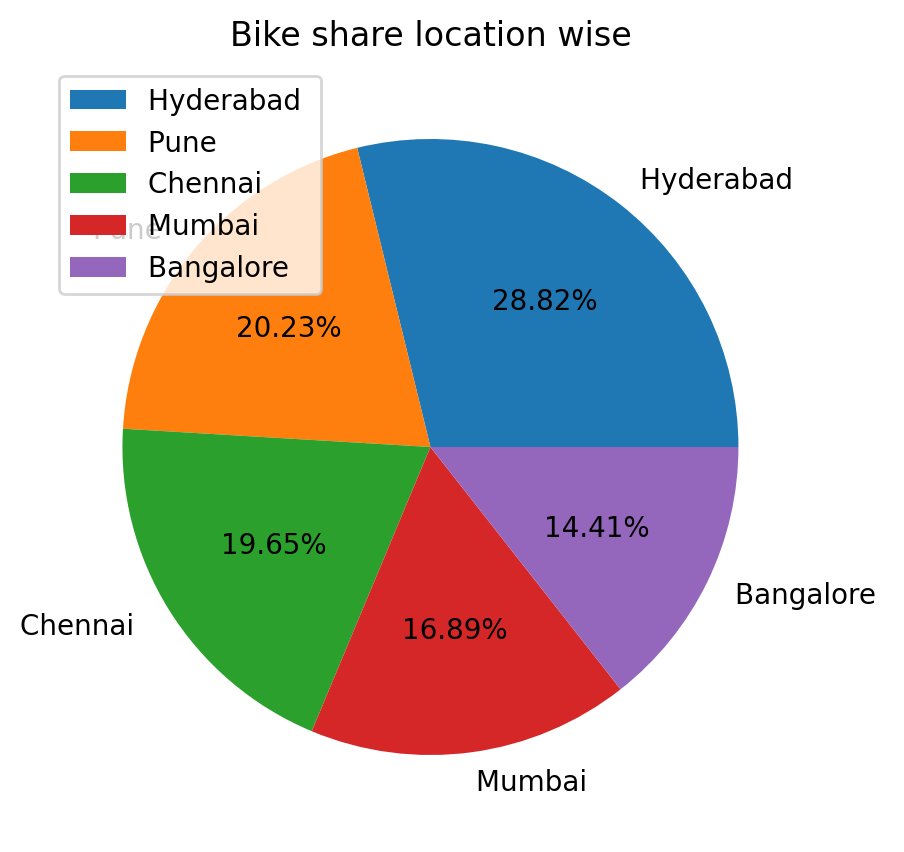

In [79]:
# This is pie plot shows share of the selling bikes location-wise.
plt.figure(figsize=(7,5), dpi = 100)
plt.pie(x = bike_cleaned.location.value_counts().values,
        labels = bike_cleaned.location.value_counts().index,autopct = '%.2f%%')
plt.title('Bike share location wise')
plt.legend(loc = 'upper left')
plt.show();

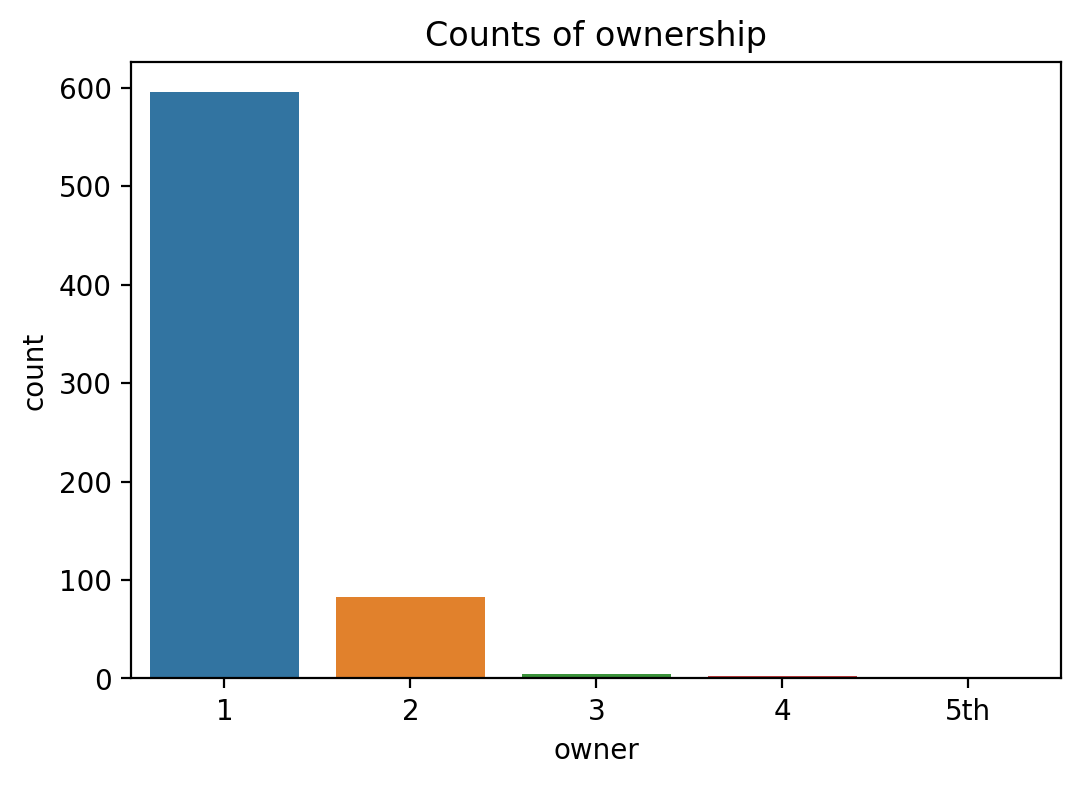

In [80]:
# count plot for owners column.
plt.figure(figsize=(6,4), dpi = 100)
sns.countplot(x = bike_cleaned.owner)
plt.title('Counts of ownership');

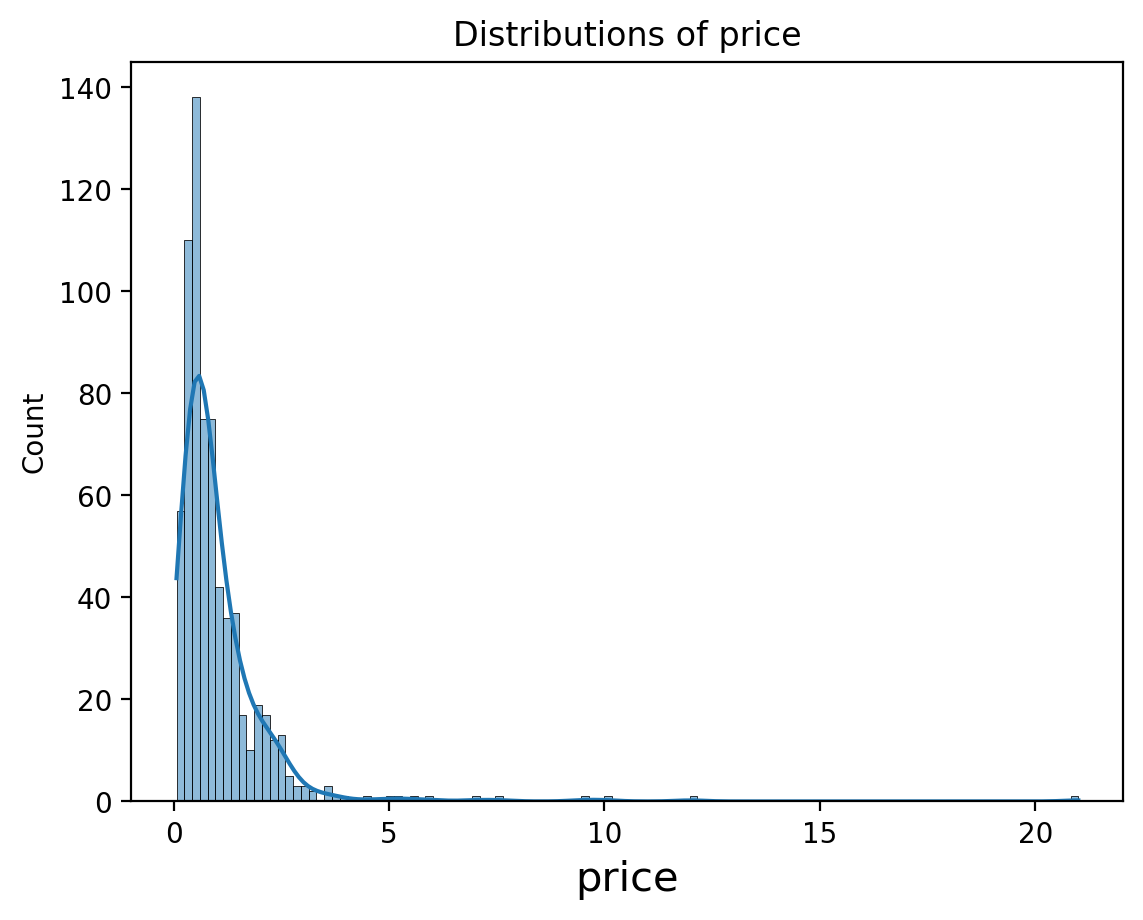

In [81]:
sns.histplot(bike_cleaned.price.values/100000, kde=True)
plt.xlabel('price',fontsize = 15, color = 'black')
plt.title('Distributions of price');

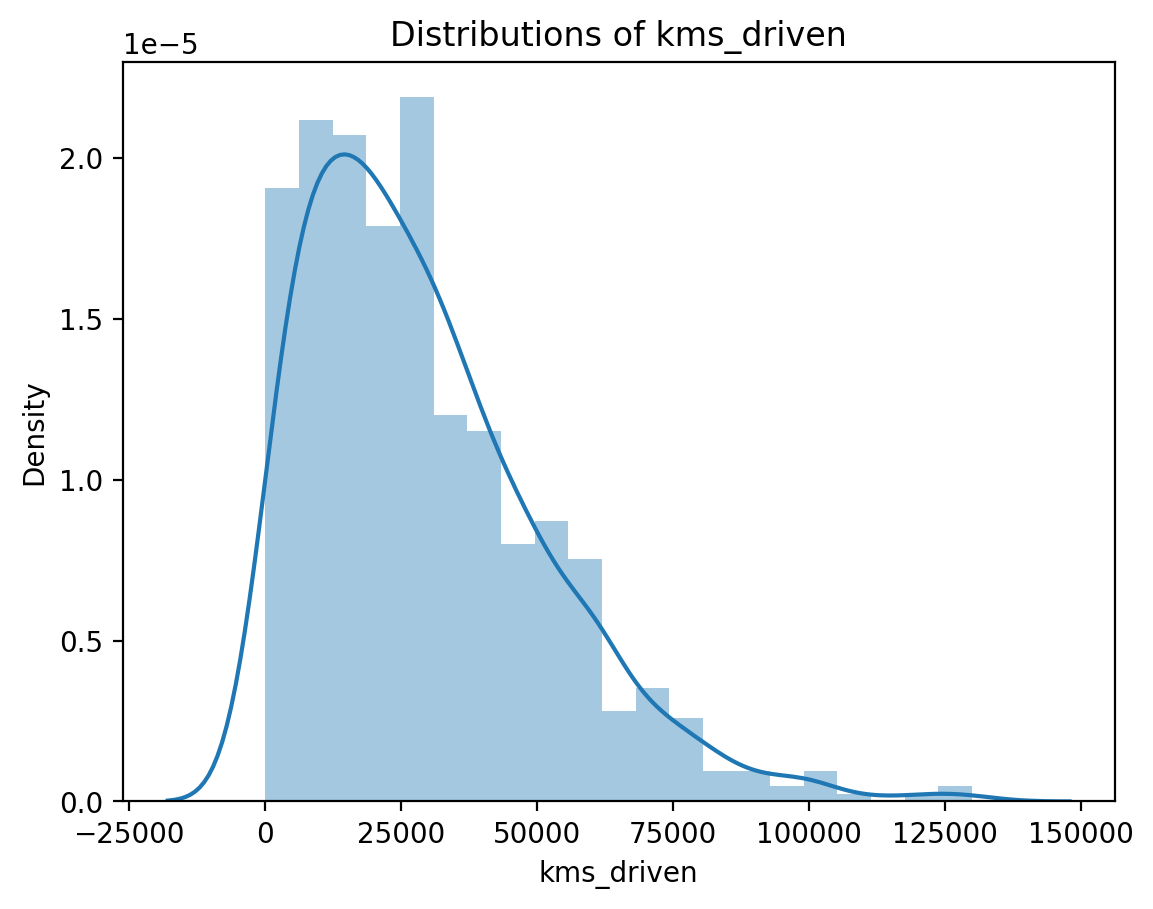

In [82]:
sns.distplot(bike_cleaned.kms_driven)
plt.title('Distributions of kms_driven');

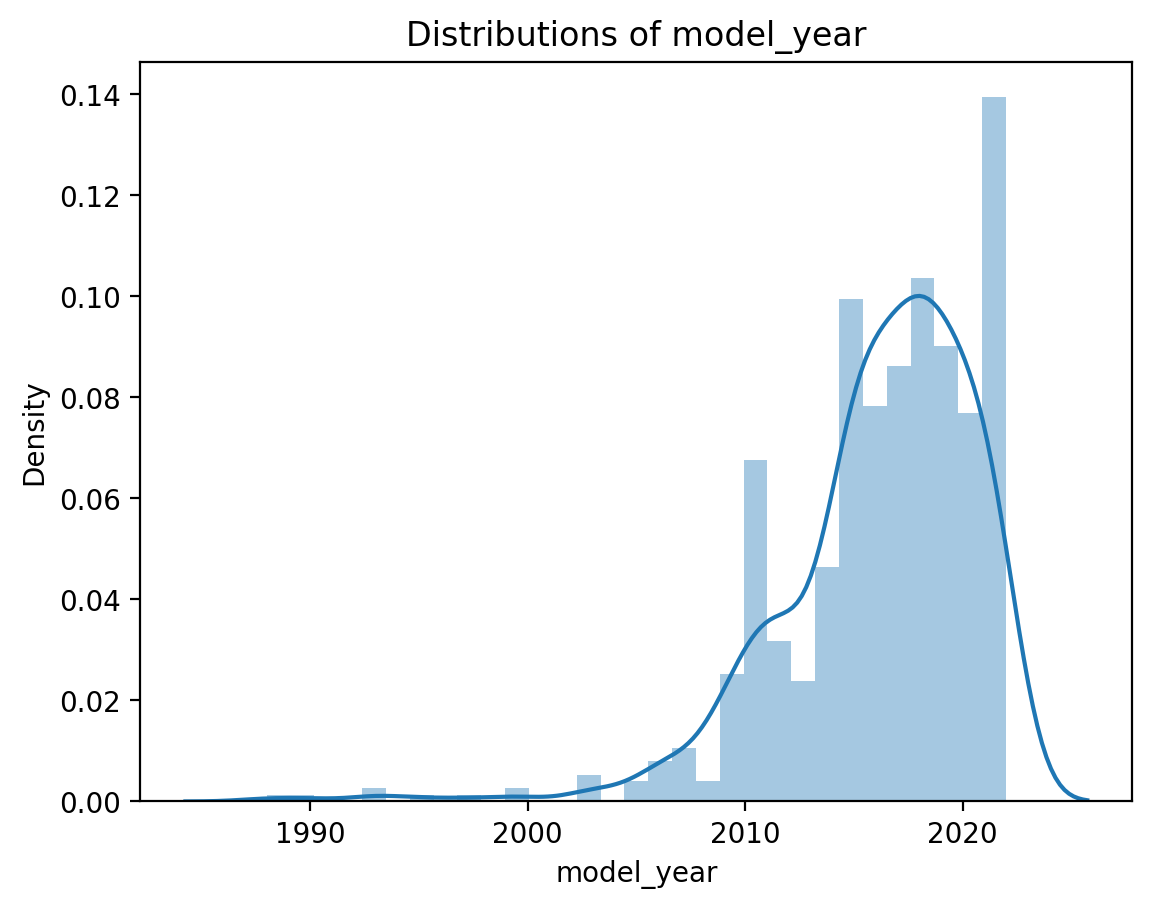

In [83]:
sns.distplot(bike_cleaned.model_year)
plt.title('Distributions of model_year');

In [84]:
# This outliers data storing in the variable is premium_bikes.
premium_bikes = bike_cleaned[(bike_cleaned.price > UL)]

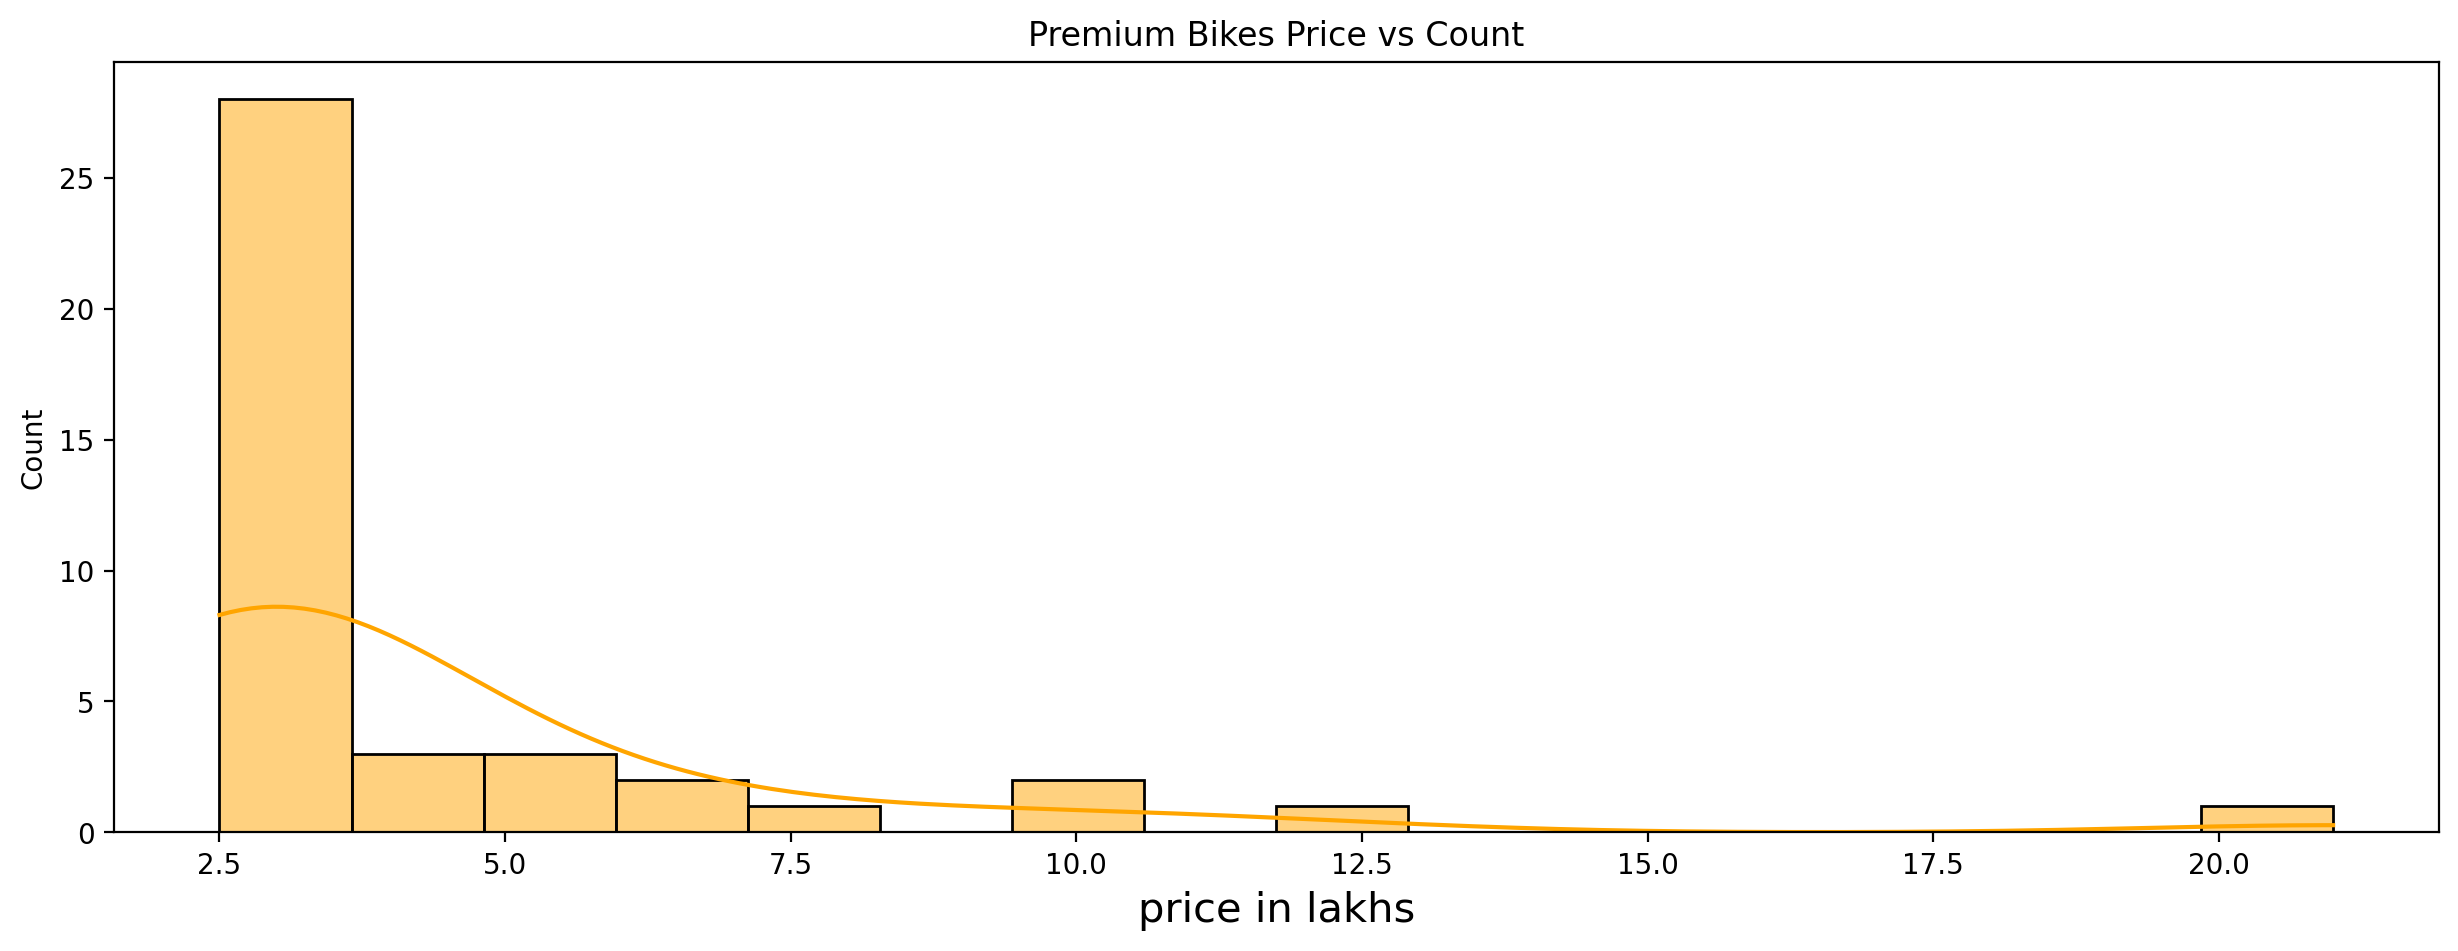

In [85]:
# These is histplot for premium bikes.
plt.figure(figsize=(15,5))
sns.histplot(x=premium_bikes.price.values/100000, color = 'orange', kde= True,legend=True)
plt.xlabel('price in lakhs',fontsize = 15, color = 'black')
plt.title('Premium Bikes Price vs Count');

## Bivariate analysis

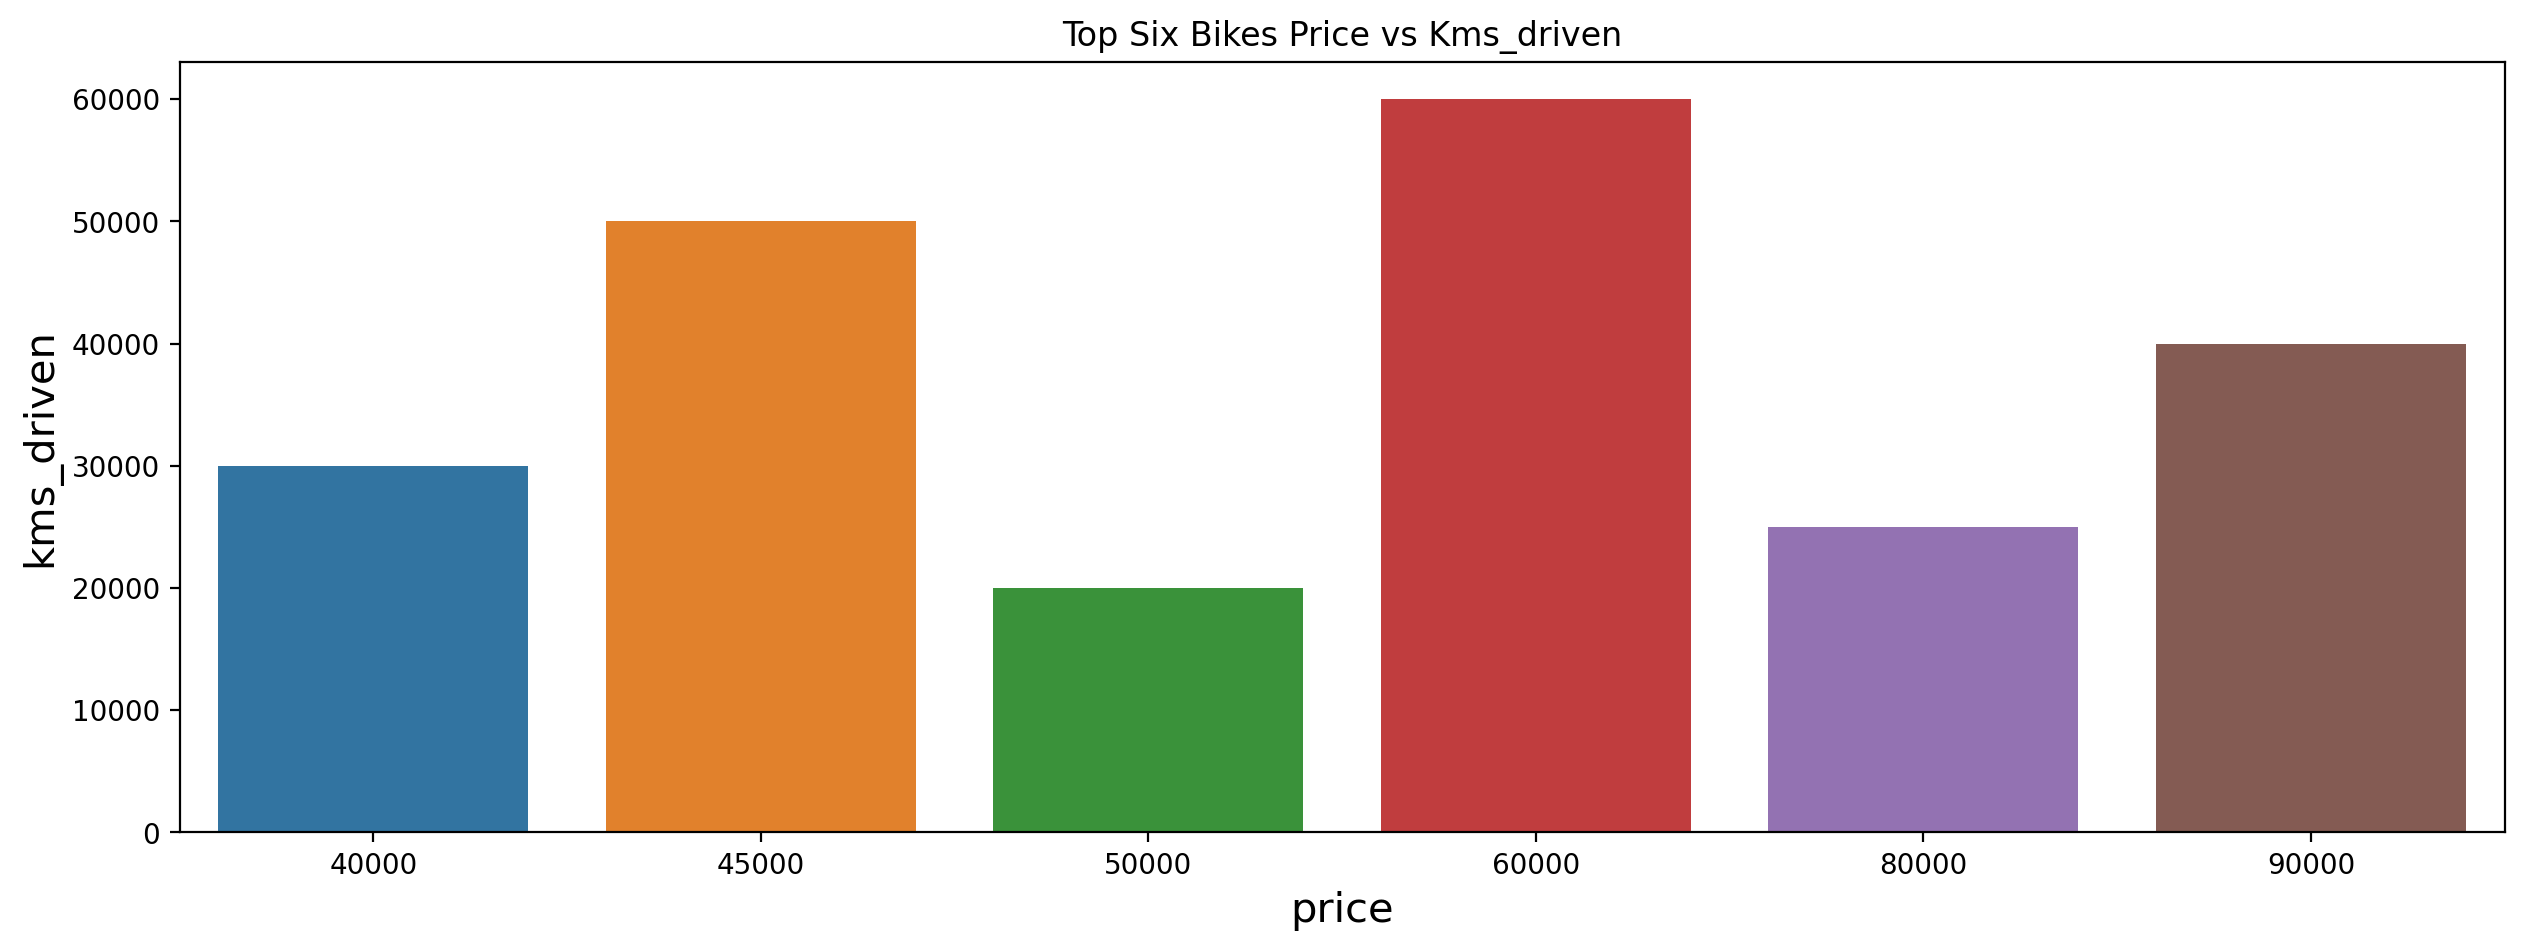

In [112]:
# this is bar plot for the price vs kms_driven.
plt.figure(figsize=(15,5), dpi = 100)
sns.barplot(x=bike_cleaned.price.value_counts()[0:6].index,
            y=bike_cleaned.kms_driven.value_counts()[0:6].index, ci = False)
plt.xlabel('price',fontsize = 15, color = 'black')
plt.ylabel('kms_driven',fontsize = 15, color = 'black')
plt.title('Top Six Bikes Price vs Kms_driven');

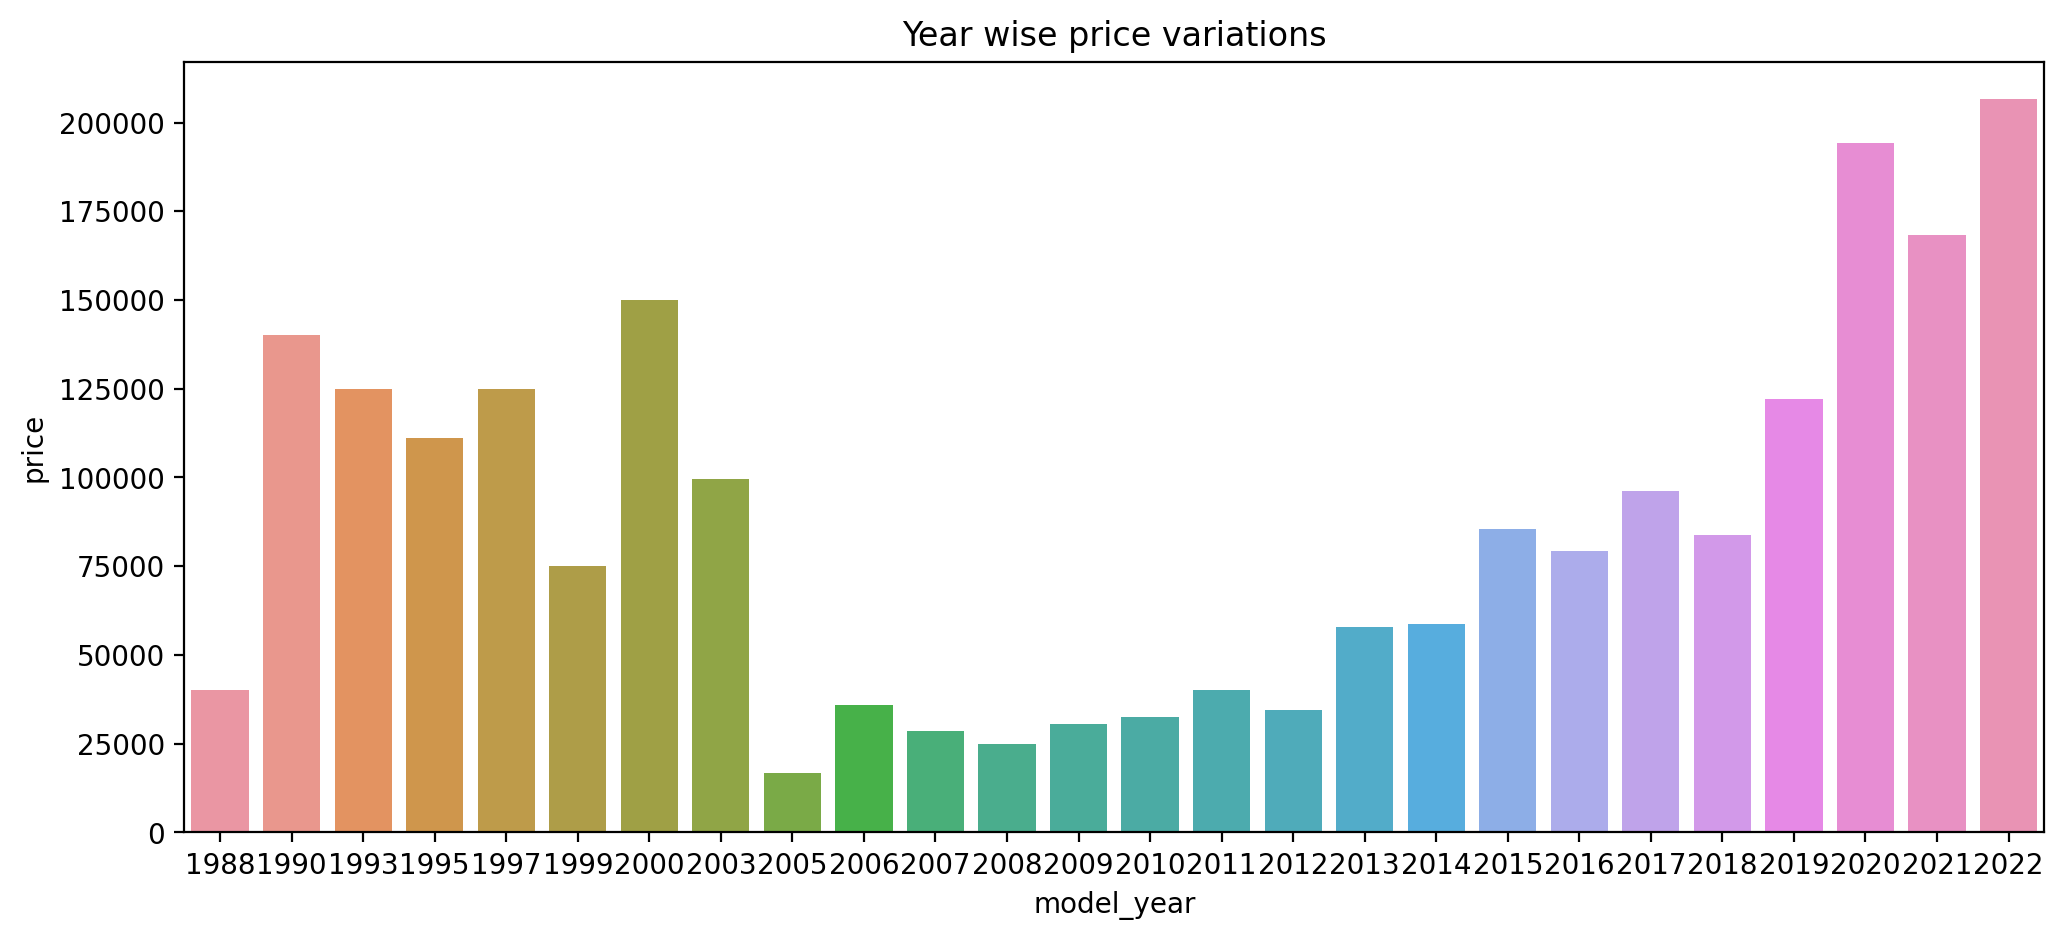

In [87]:
# This is bar plot for the price vs model_year.
plt.figure(figsize=(12,5), dpi = 100)
sns.barplot(x=bike_cleaned.model_year, y=bike_cleaned.price, ci = False)
plt.title('Year wise price variations');

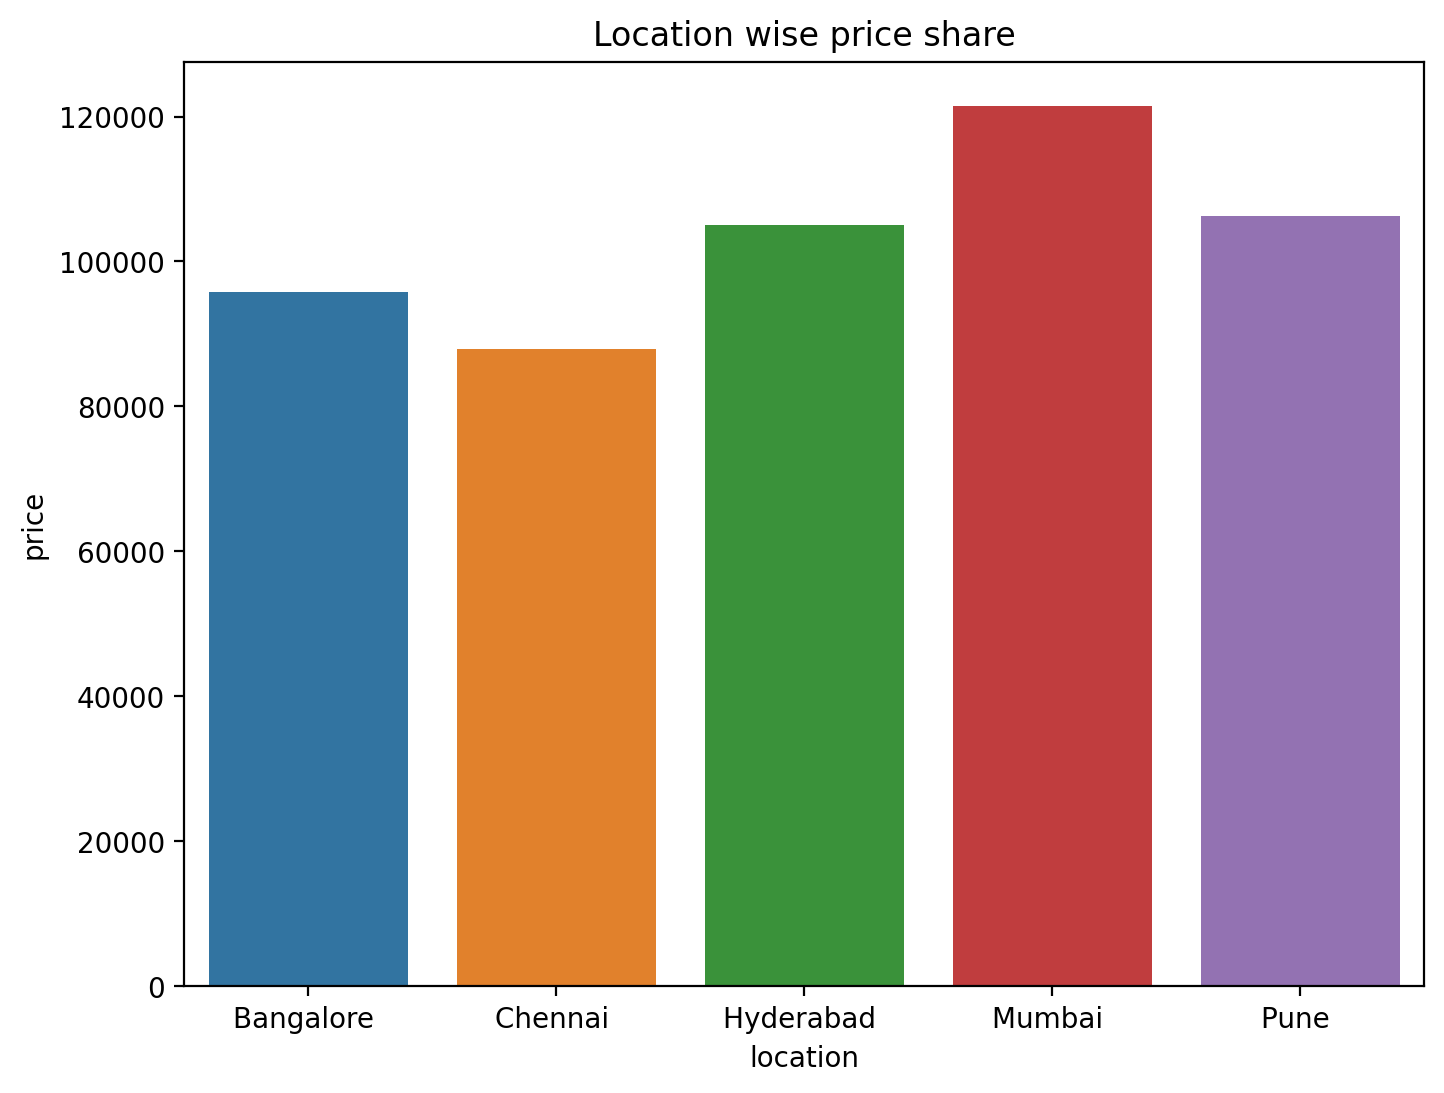

In [88]:
# This is bar plot for the location, price, owner columns.
plt.figure(figsize=(8,6))
sns.barplot(x = bike_cleaned.location, y = bike_cleaned.price, ci = False)
plt.title('Location wise price share');

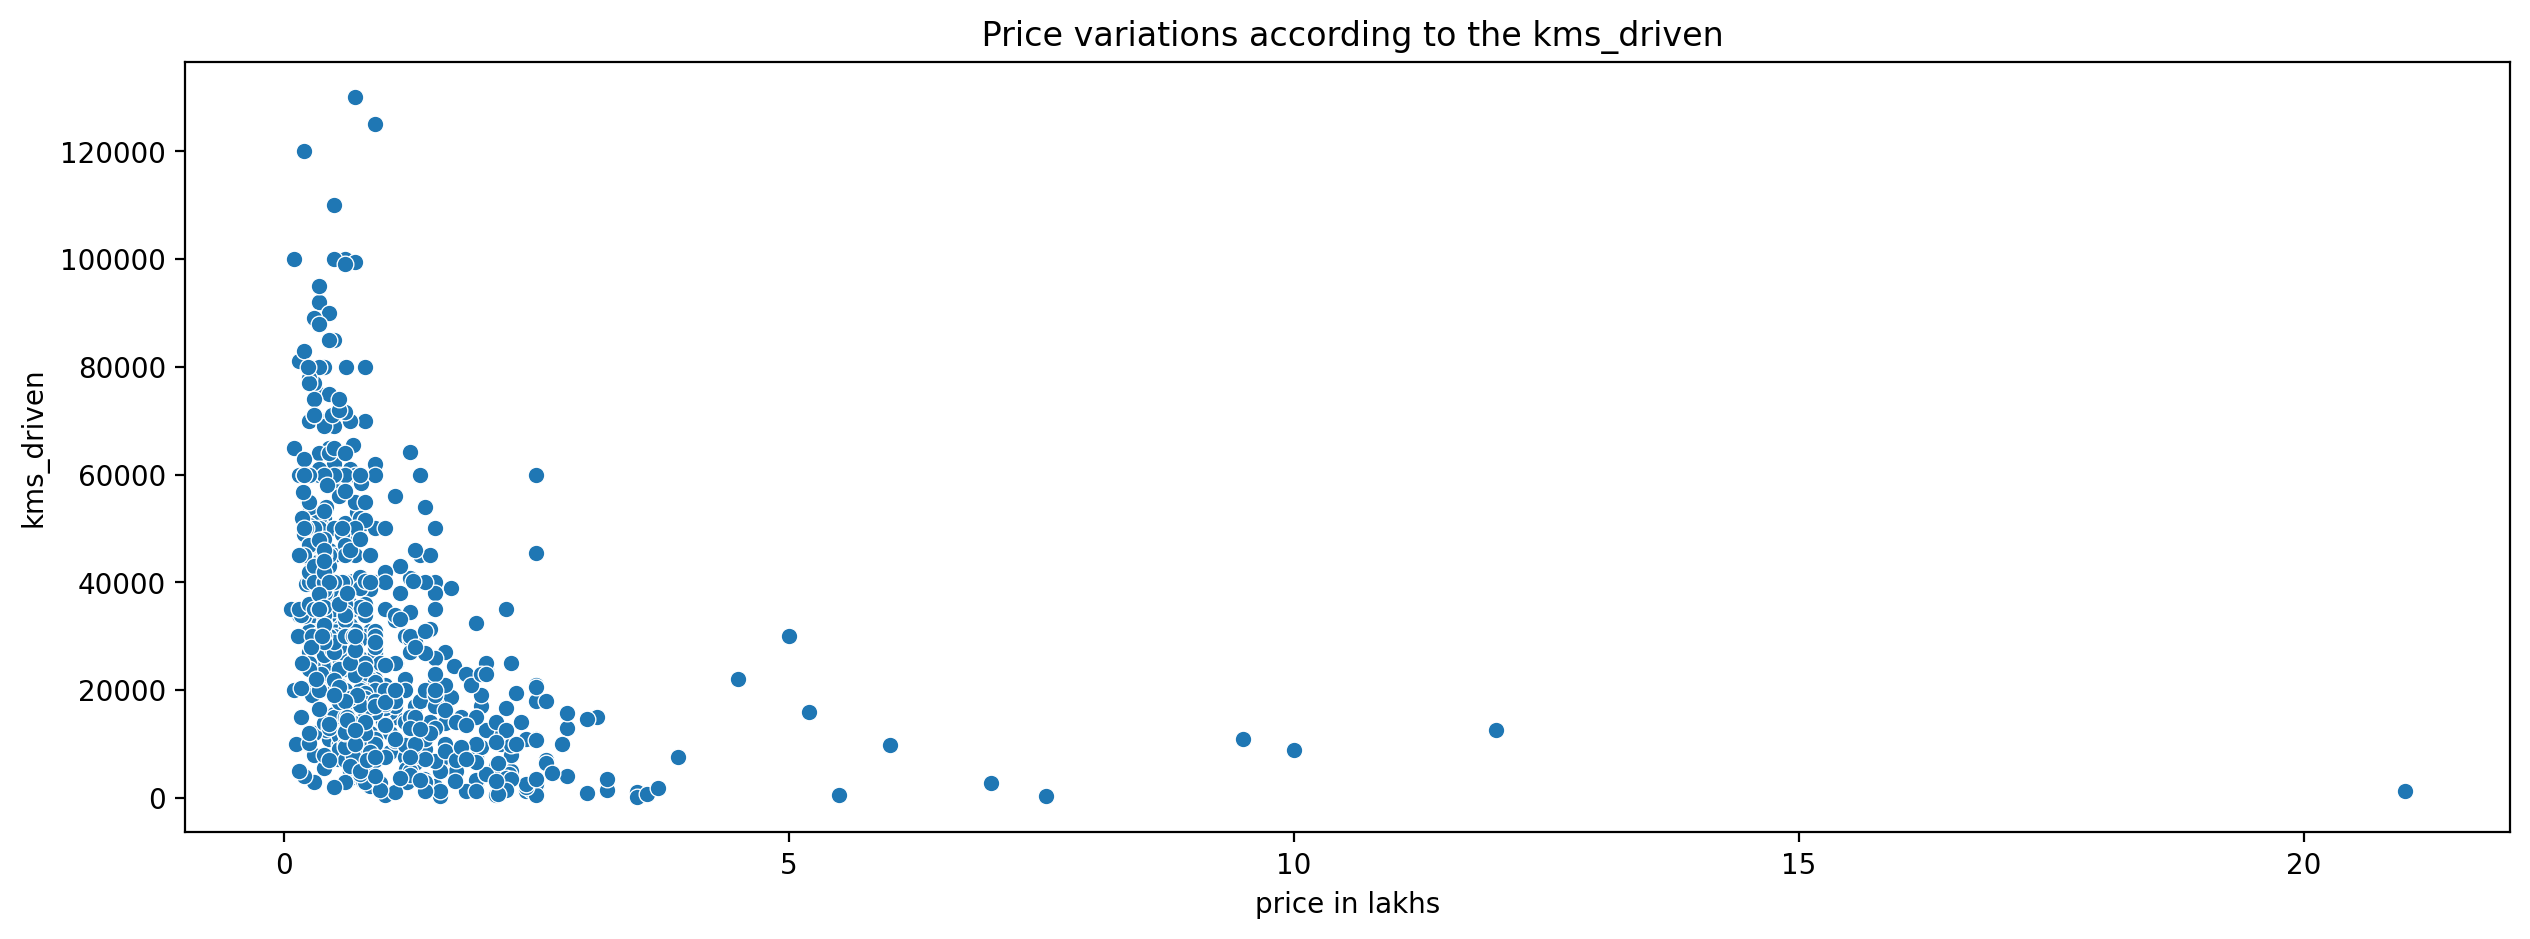

In [89]:
# this is scatter plot for the price vs kms_driven.
plt.figure(figsize=(15,5), dpi = 100)
sns.scatterplot(x=bike_cleaned.price.values/100000,y=bike_cleaned.kms_driven)
plt.xlabel('price in lakhs',fontsize = 10, color = 'black')
plt.title(' Price variations according to the kms_driven');

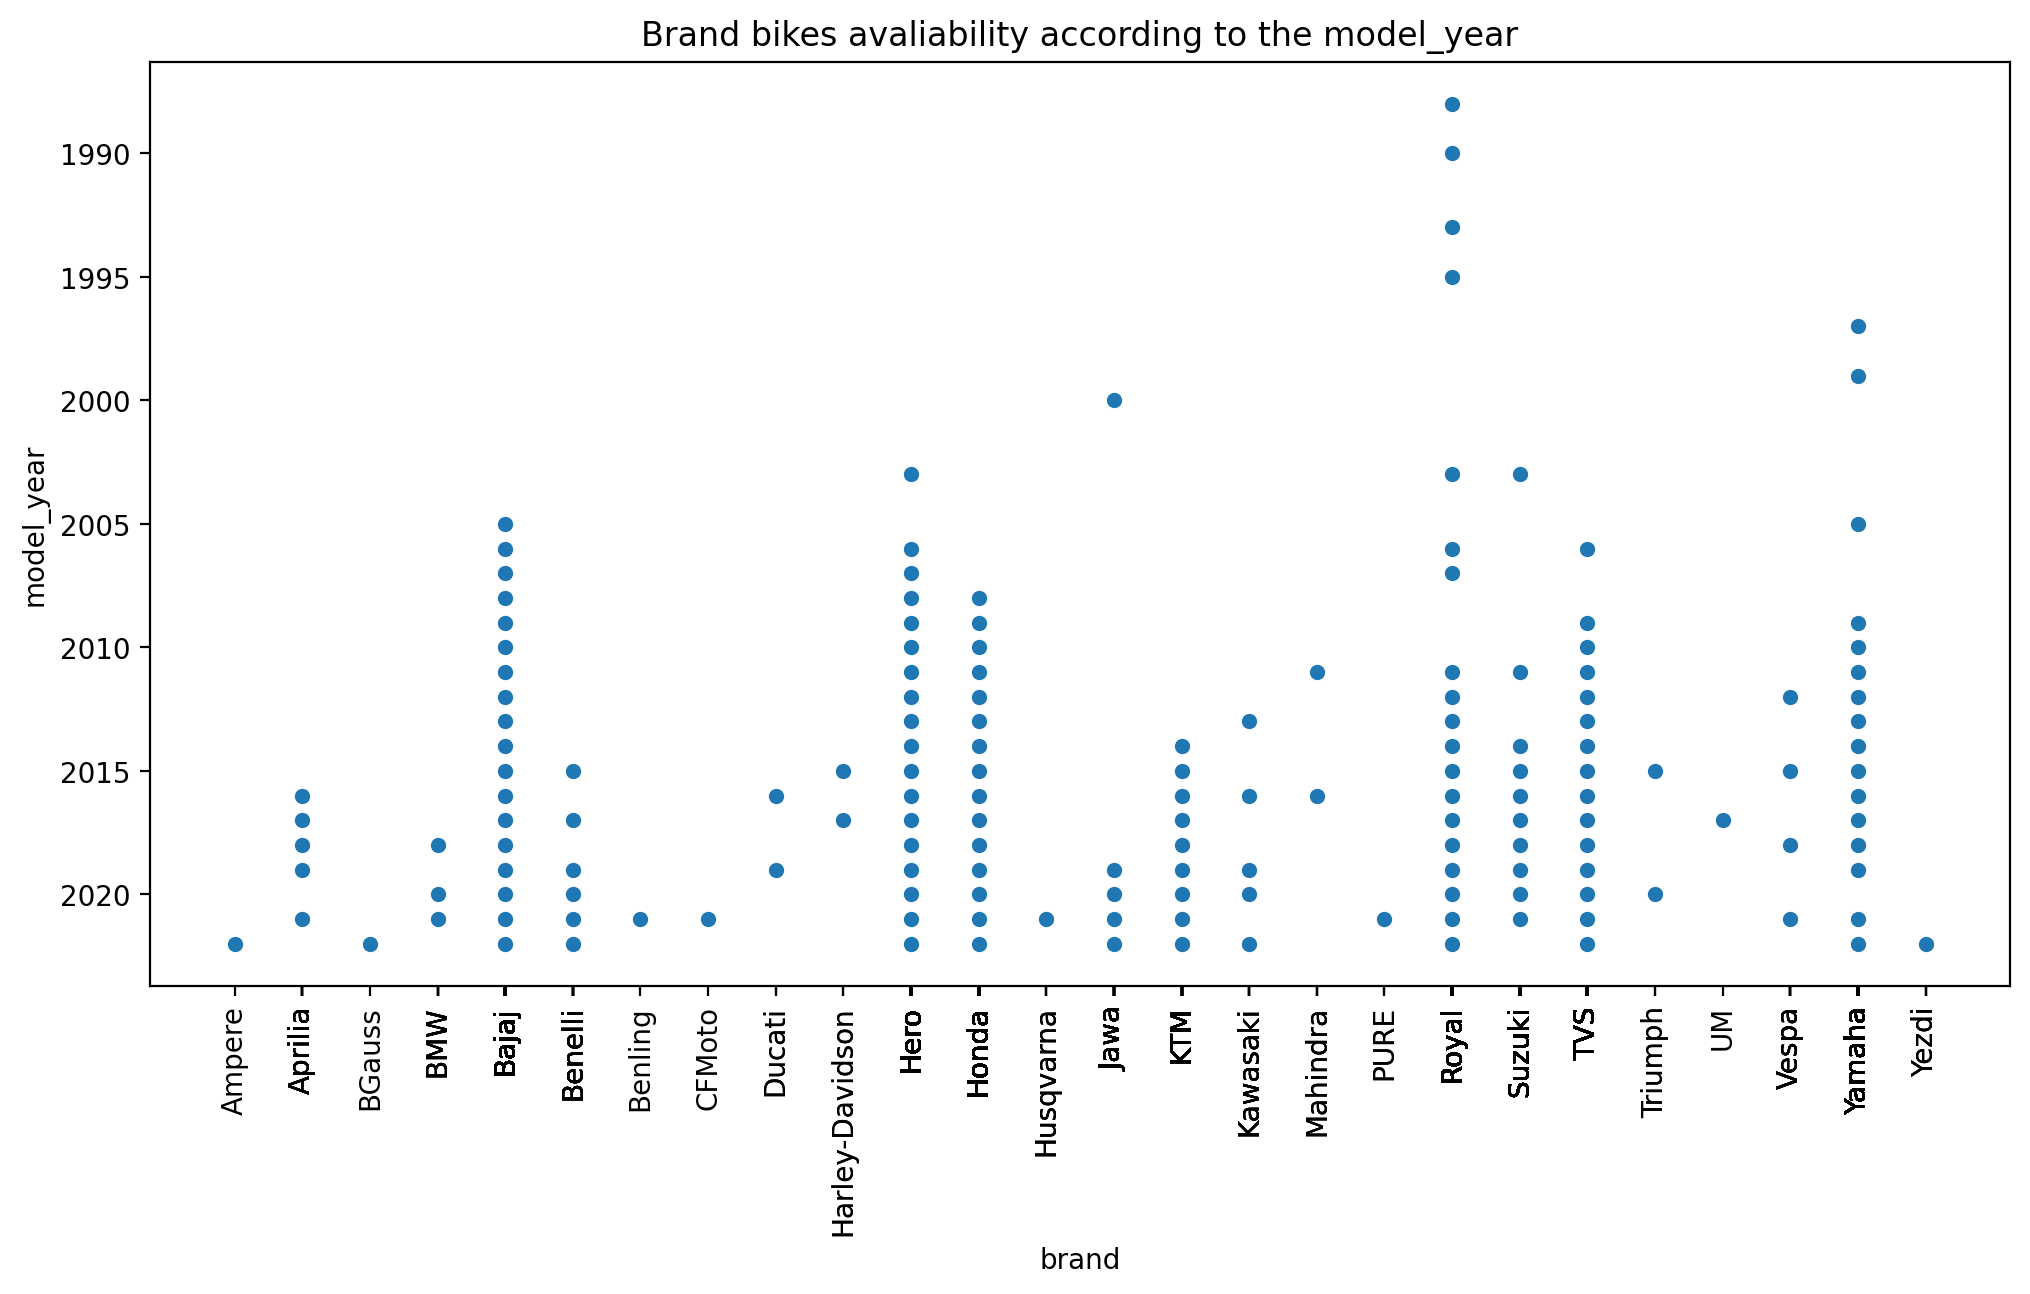

In [90]:
# This is scatter plot for the brand vs model_year.
plt.figure(figsize=(12,6))
sns.scatterplot(x= 'brand', y= 'model_year', data = bike_cleaned)
plt.xticks(bike_cleaned.brand, rotation = 90)
plt.title('Brand bikes avaliability according to the model_year');

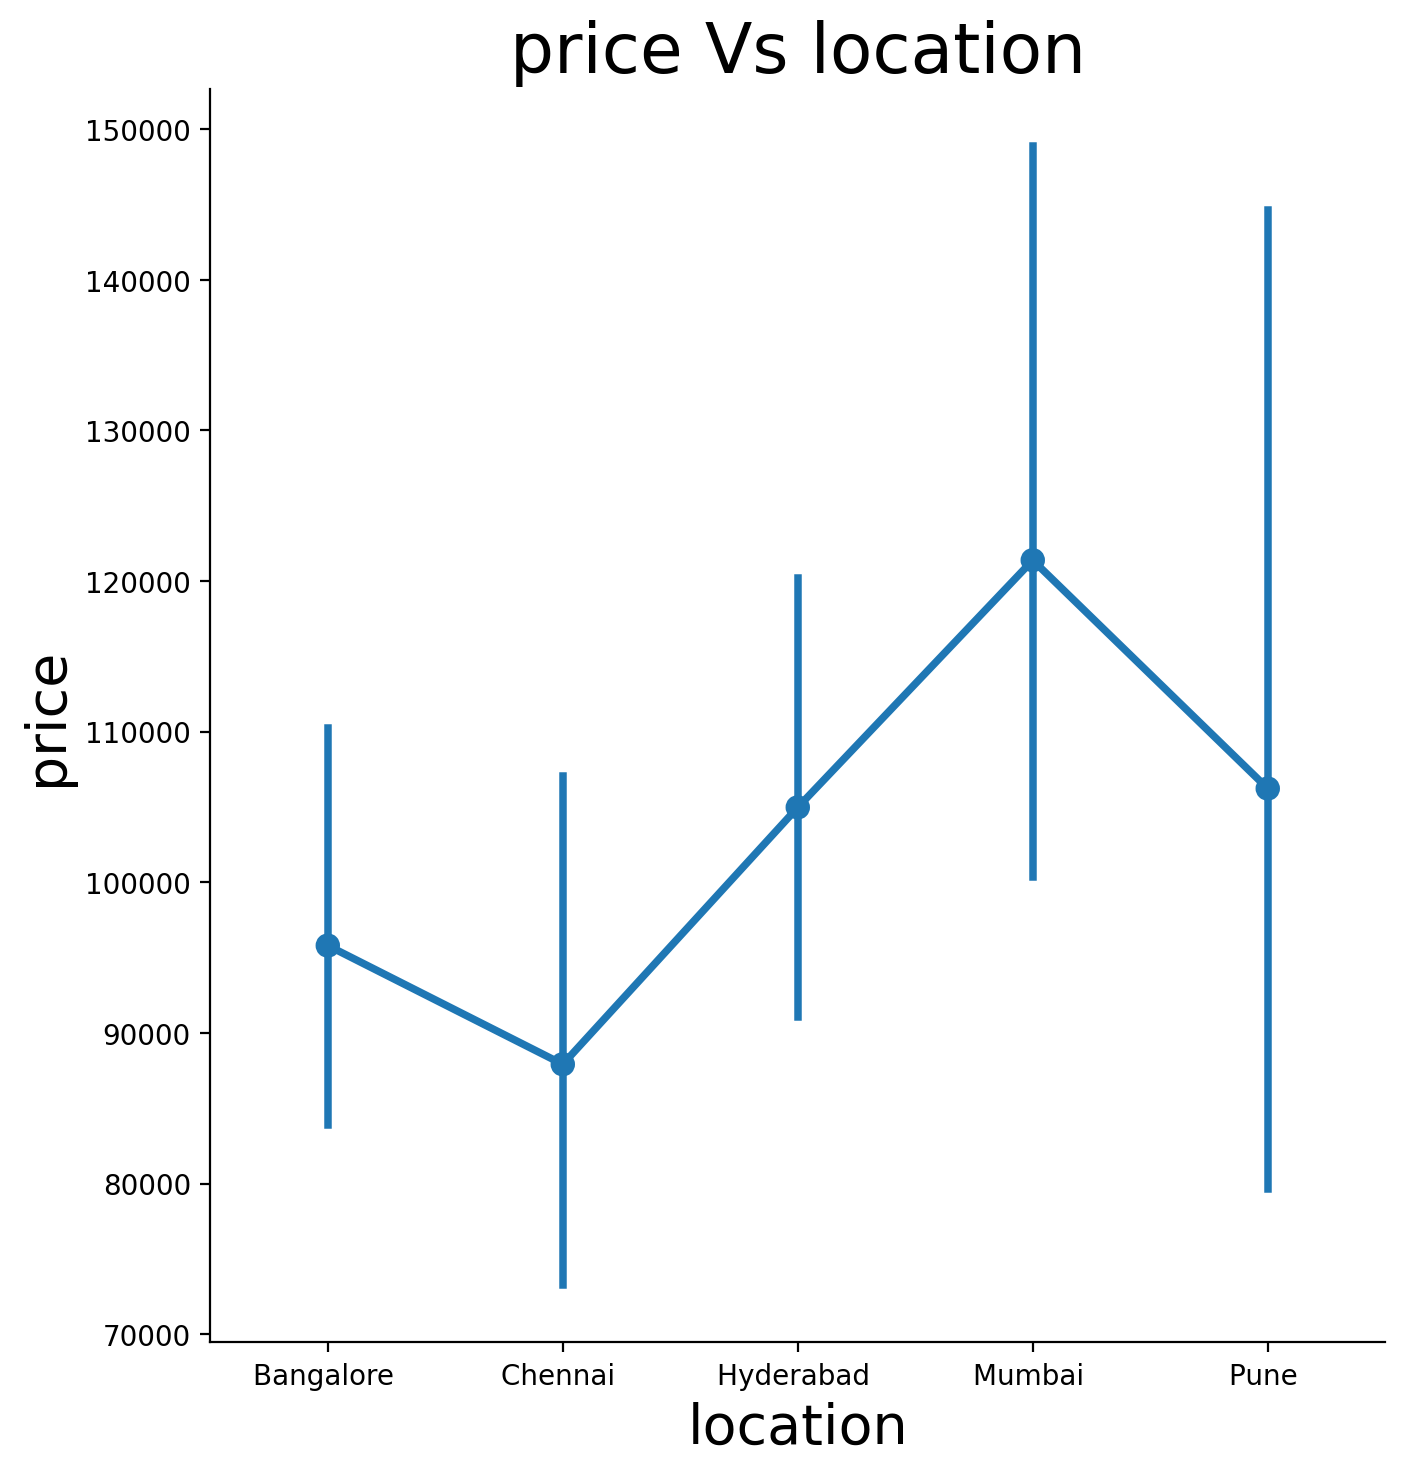

In [91]:
# location Vs Price

# plt.figure(size = (15,5), dpi = 200)
sns.catplot(data = bike_cleaned, x = 'location', y = 'price', kind = 'point', height = 7)
plt.title('price Vs location', fontsize = 25, color = 'black')
plt.xlabel('location',fontsize = 20, color = 'black')
plt.ylabel('price',fontsize = 20, color = 'black');

## Multivariate analysis 

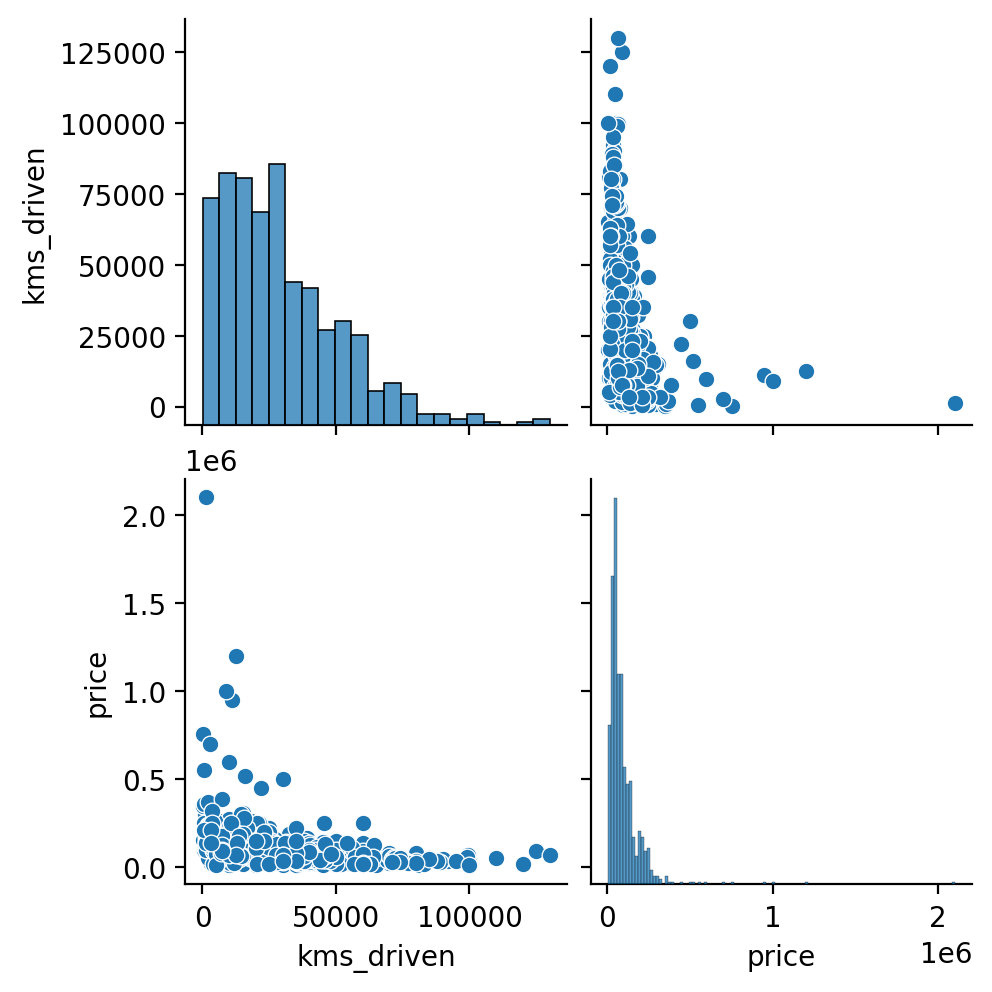

In [92]:
# This is pair plot for the all the numerical columns.
sns.pairplot(bike_cleaned);

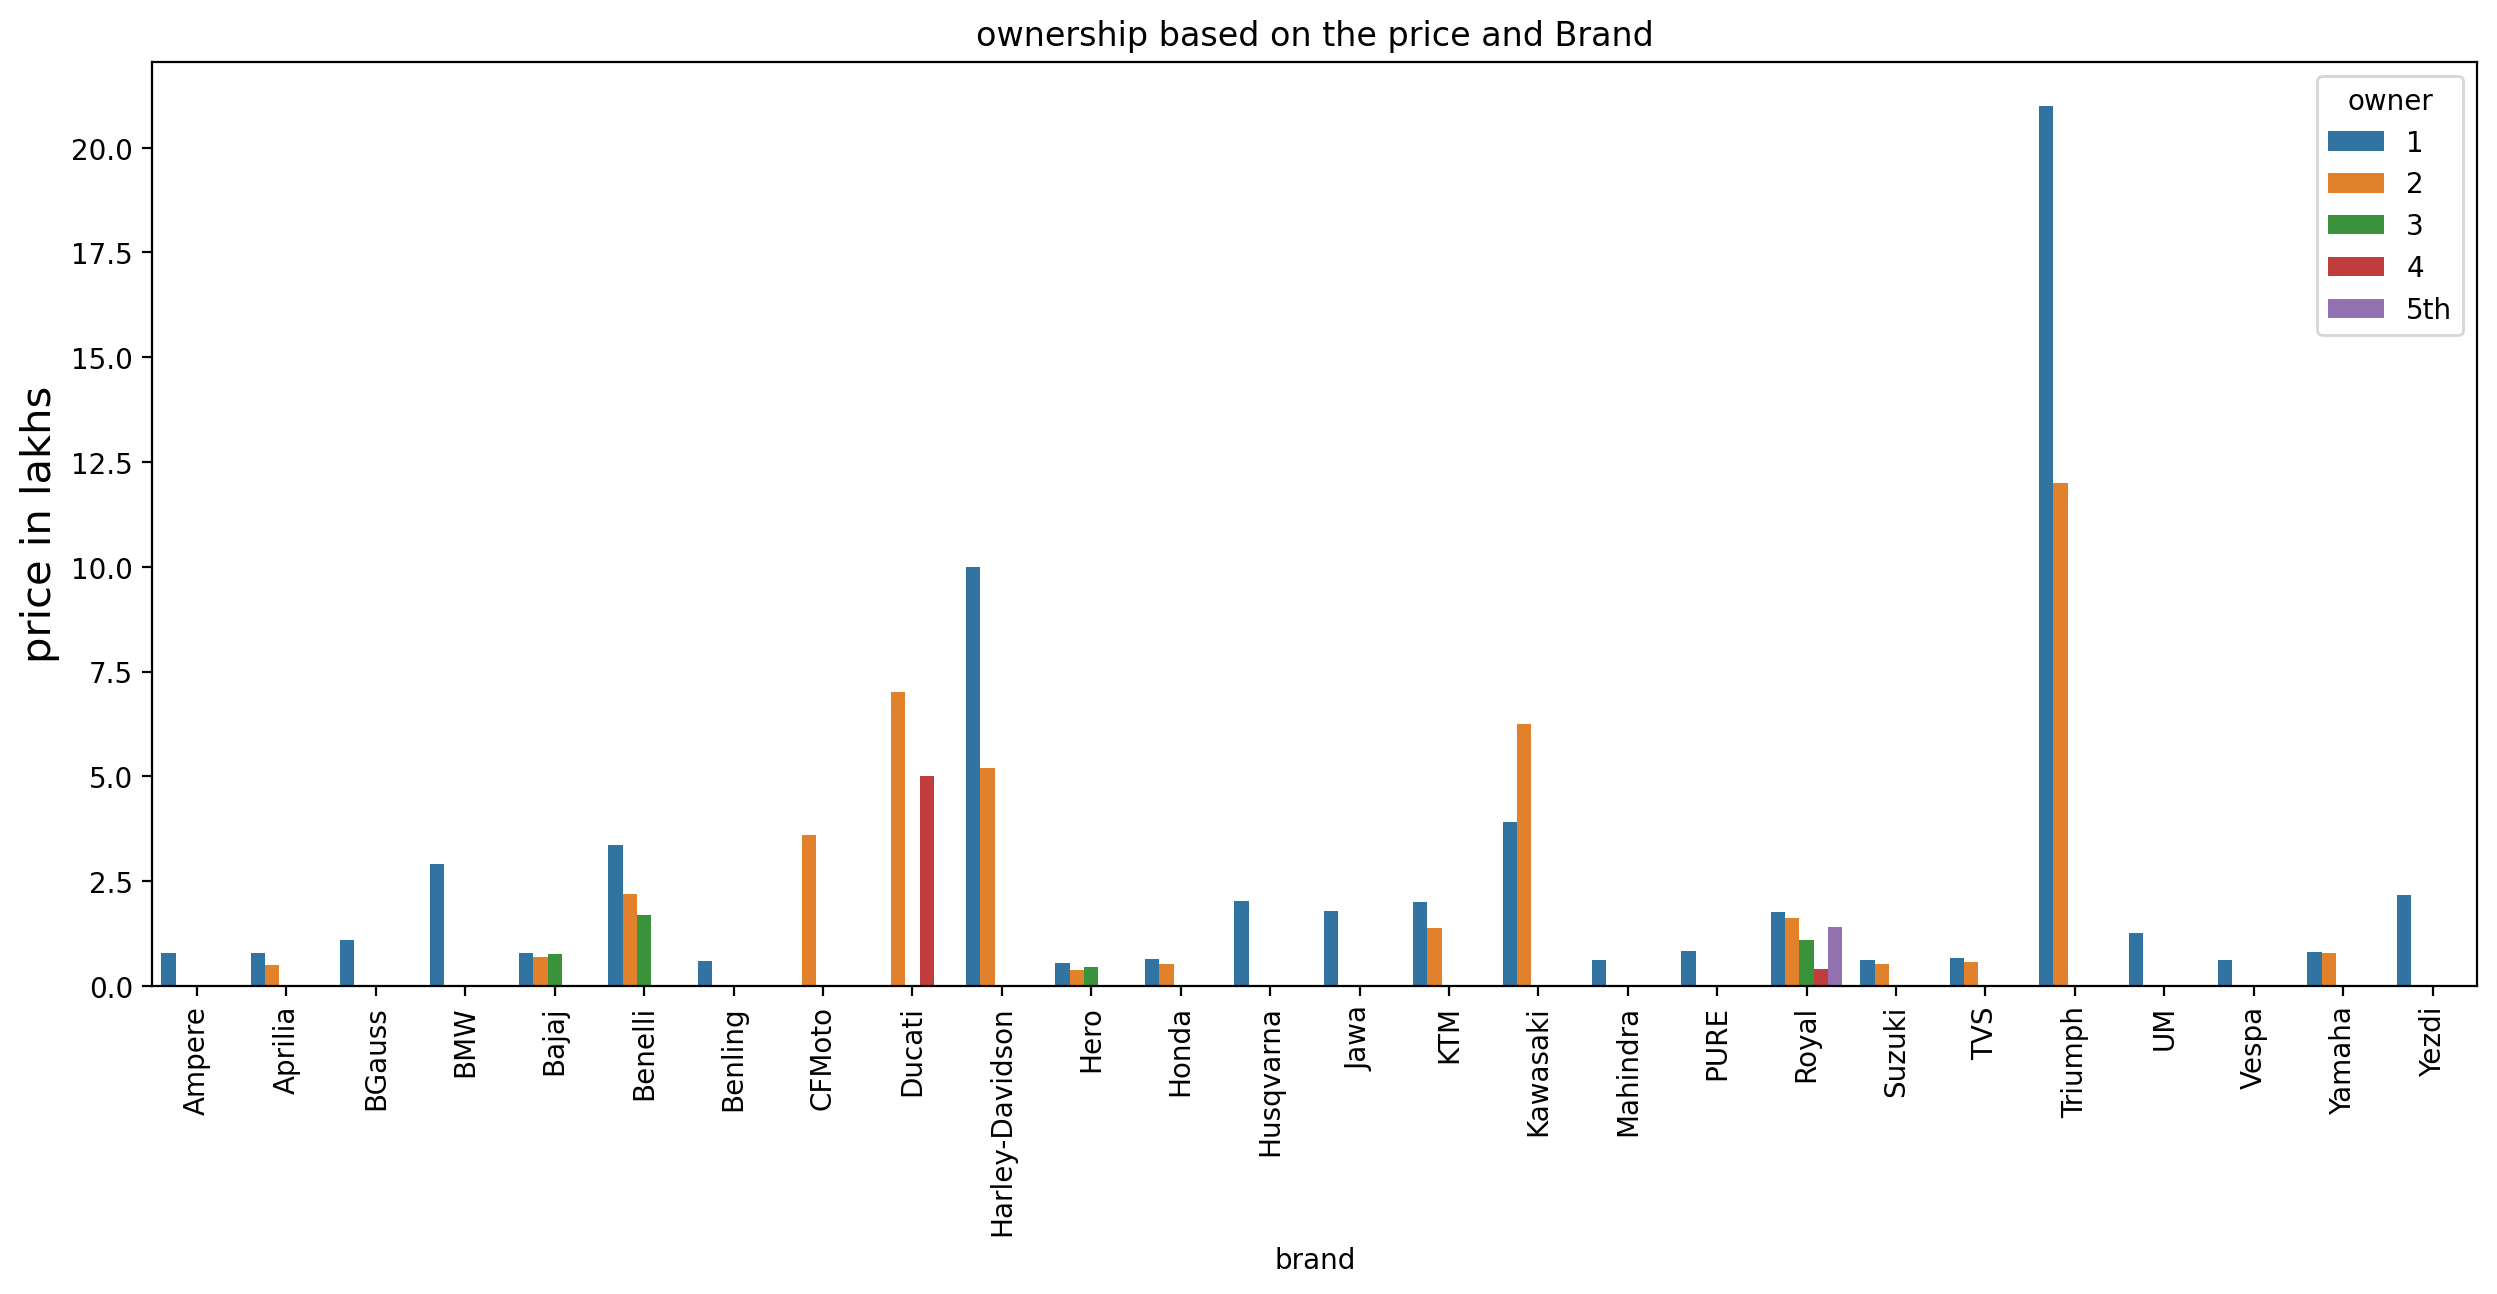

In [113]:
# This is bar plot for the brand, price, owner columns.
plt.figure(figsize=(15,6))
sns.barplot(y = bike_cleaned.price.values/100000, x = bike_cleaned.brand, ci = False, 
            hue = bike_cleaned.owner, orient='v')
plt.xticks(rotation = 90)
plt.ylabel('price in lakhs',fontsize = 15, color = 'black')
plt.title('ownership based on the price and Brand');


In [94]:
# Converting the model_year into int64 to check the correlation.
bike_cleaned.model_year = bike_cleaned.model_year.astype('int64')

In [95]:
bike_corr = bike_cleaned.corr()


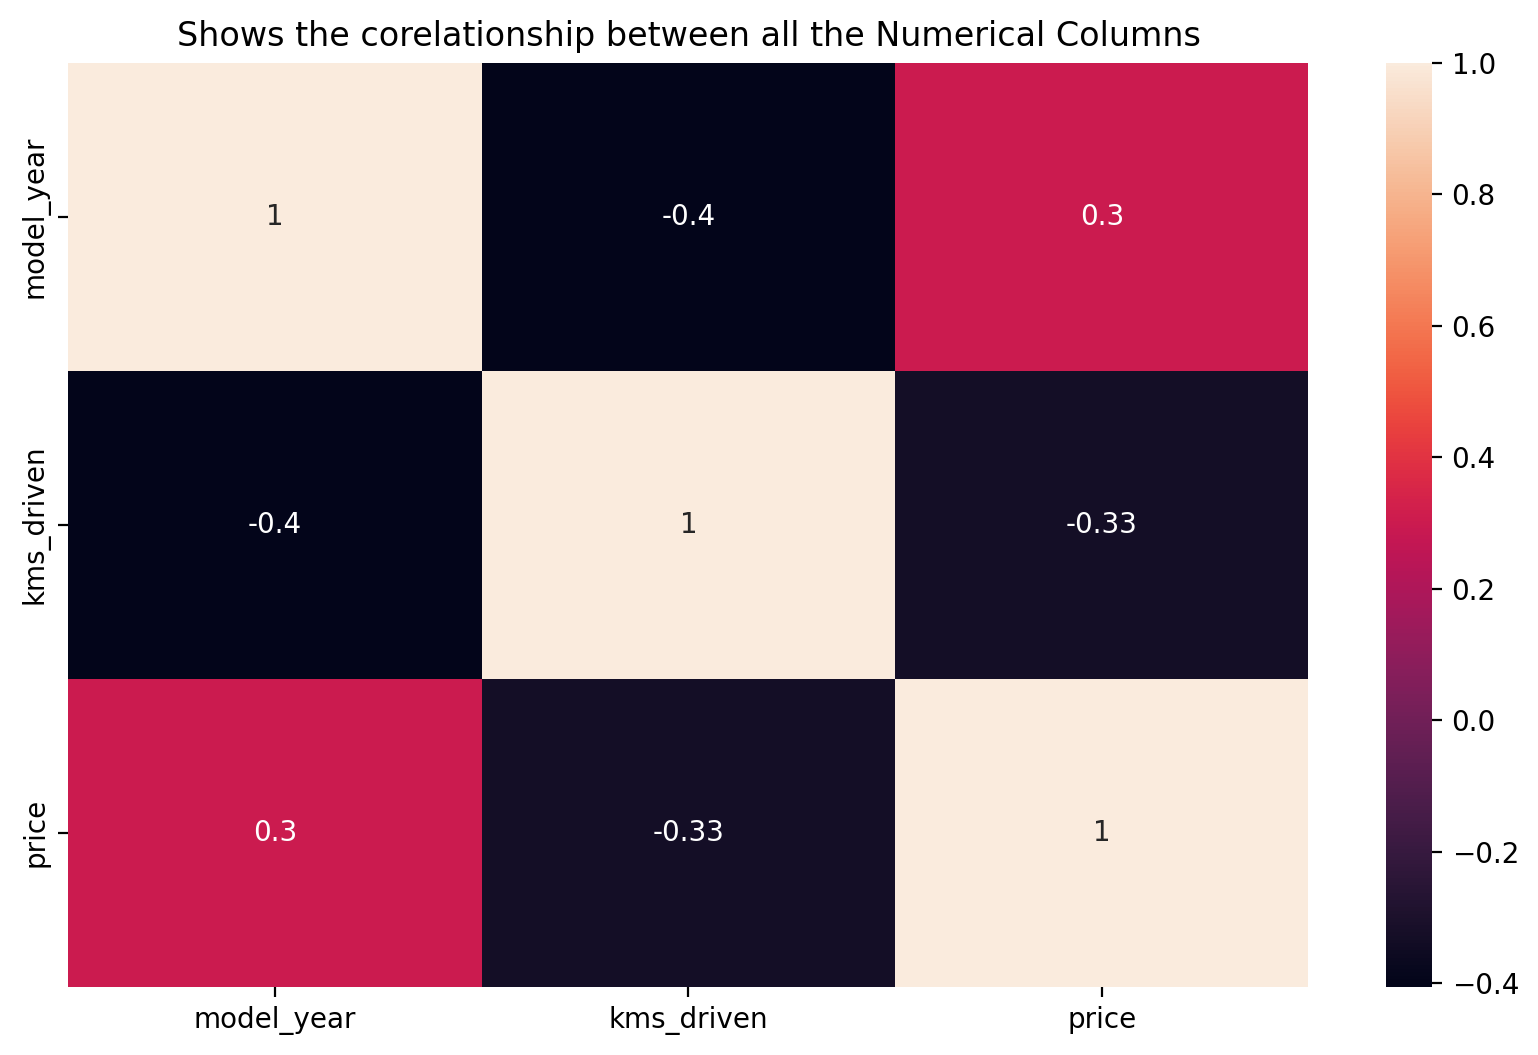

In [96]:
# This is heat map for the all the numerical columns.
plt.figure(figsize=(10,6))
sns.heatmap(bike_corr, annot=True)
plt.title('Shows the corelationship between all the Numerical Columns');

<Figure size 1500x500 with 0 Axes>

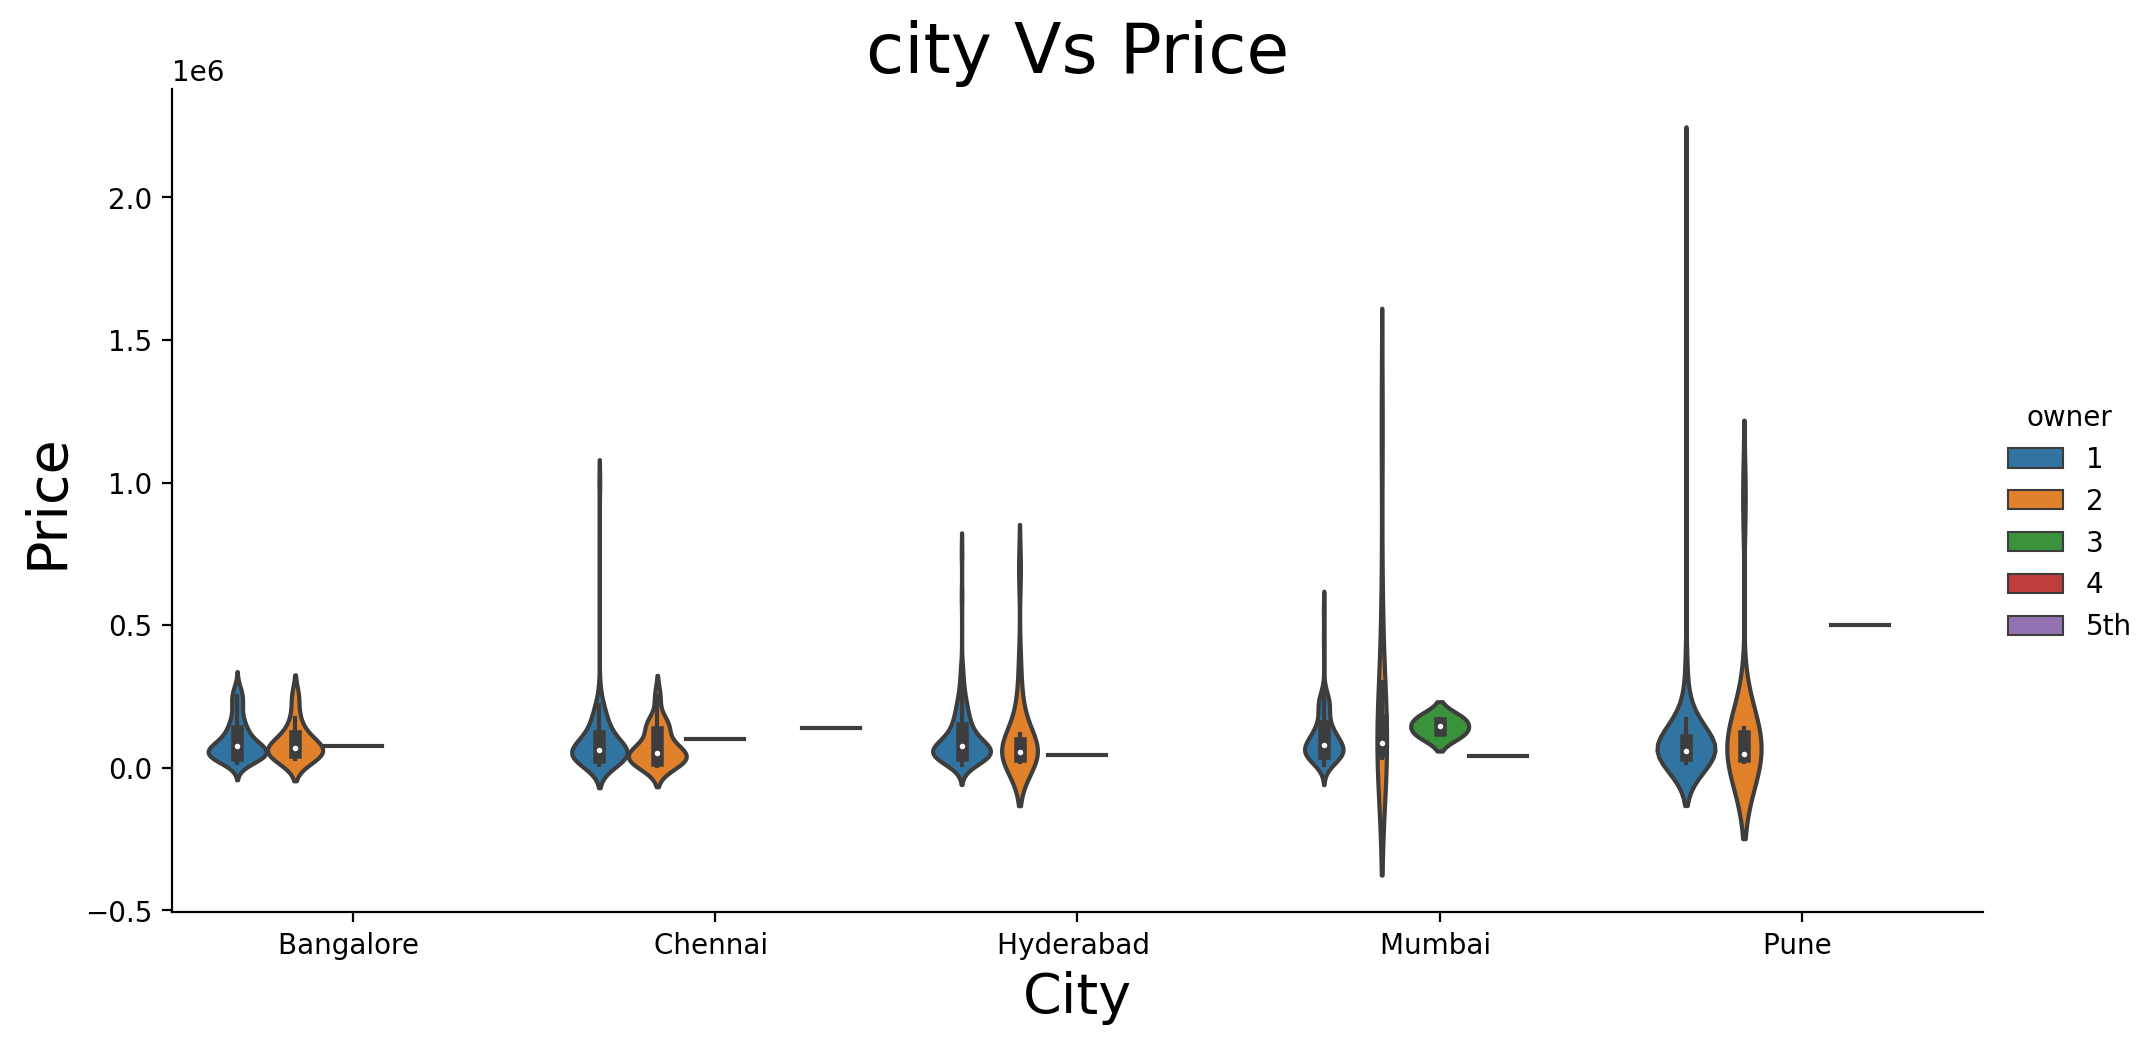

In [107]:
# LOcation Vs Price

plt.figure(figsize=(15,5))
sns.catplot(data =  bike_cleaned, x = 'location', y = 'price',hue = "owner", kind = 'violin', aspect=2 );
plt.title('city Vs Price', fontsize = 25, color = 'black',)
plt.xlabel('City',fontsize = 20, color = 'black')
plt.ylabel('Price',fontsize = 20, color = 'black');

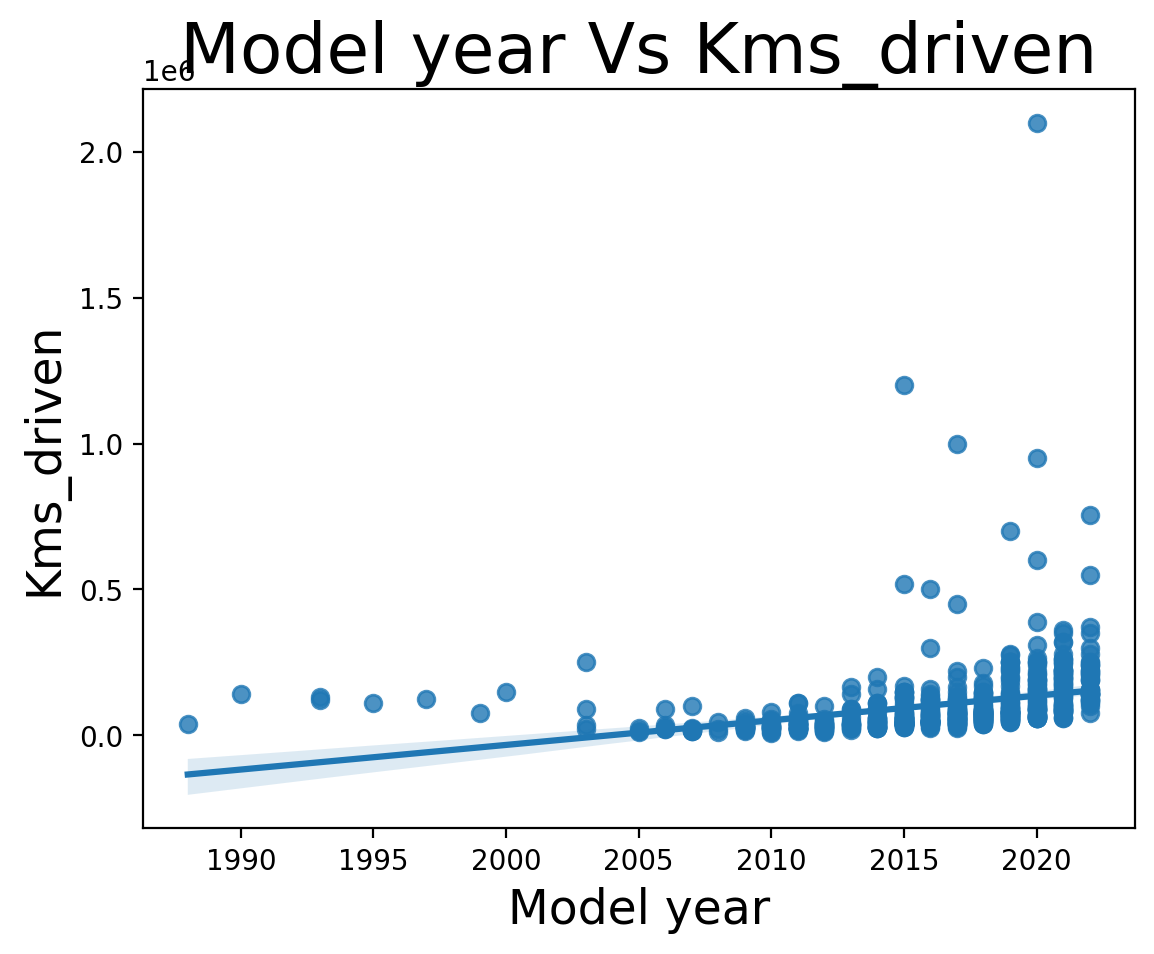

In [108]:
# Model year Vs kms driven

sns.regplot(data = bike_cleaned , x='model_year', y ='price')
plt.title('Model year Vs Kms_driven', fontsize = 25, color = 'black')
plt.xlabel('Model year',fontsize = 17, color = 'black')
plt.ylabel('Kms_driven',fontsize = 17, color = 'black');

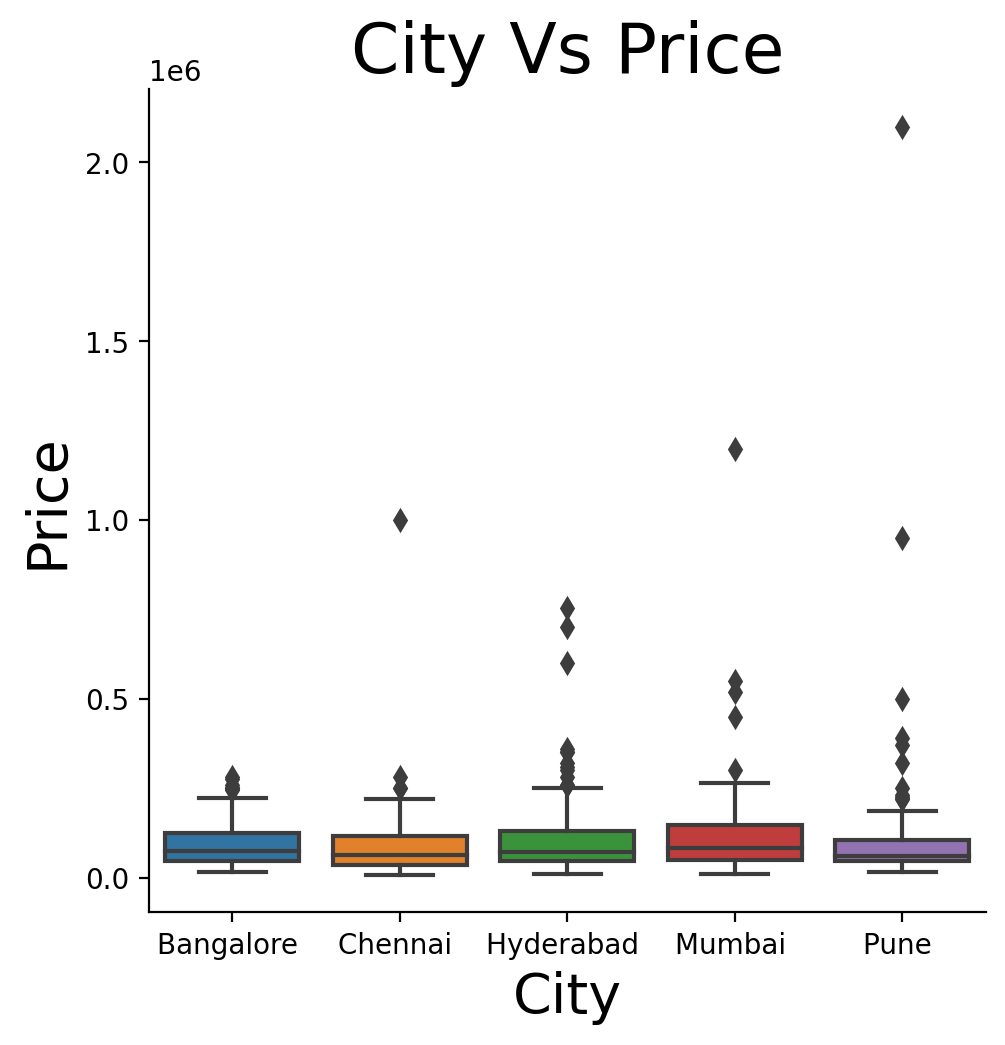

In [114]:
# City Vs Price

sns.catplot(data = bike_cleaned, x = 'location', y = 'price', kind = 'box')
plt.title('City Vs Price', fontsize = 25, color = 'black')
plt.xlabel('City',fontsize = 20, color = 'black')
plt.ylabel('Price',fontsize = 20, color = 'black');

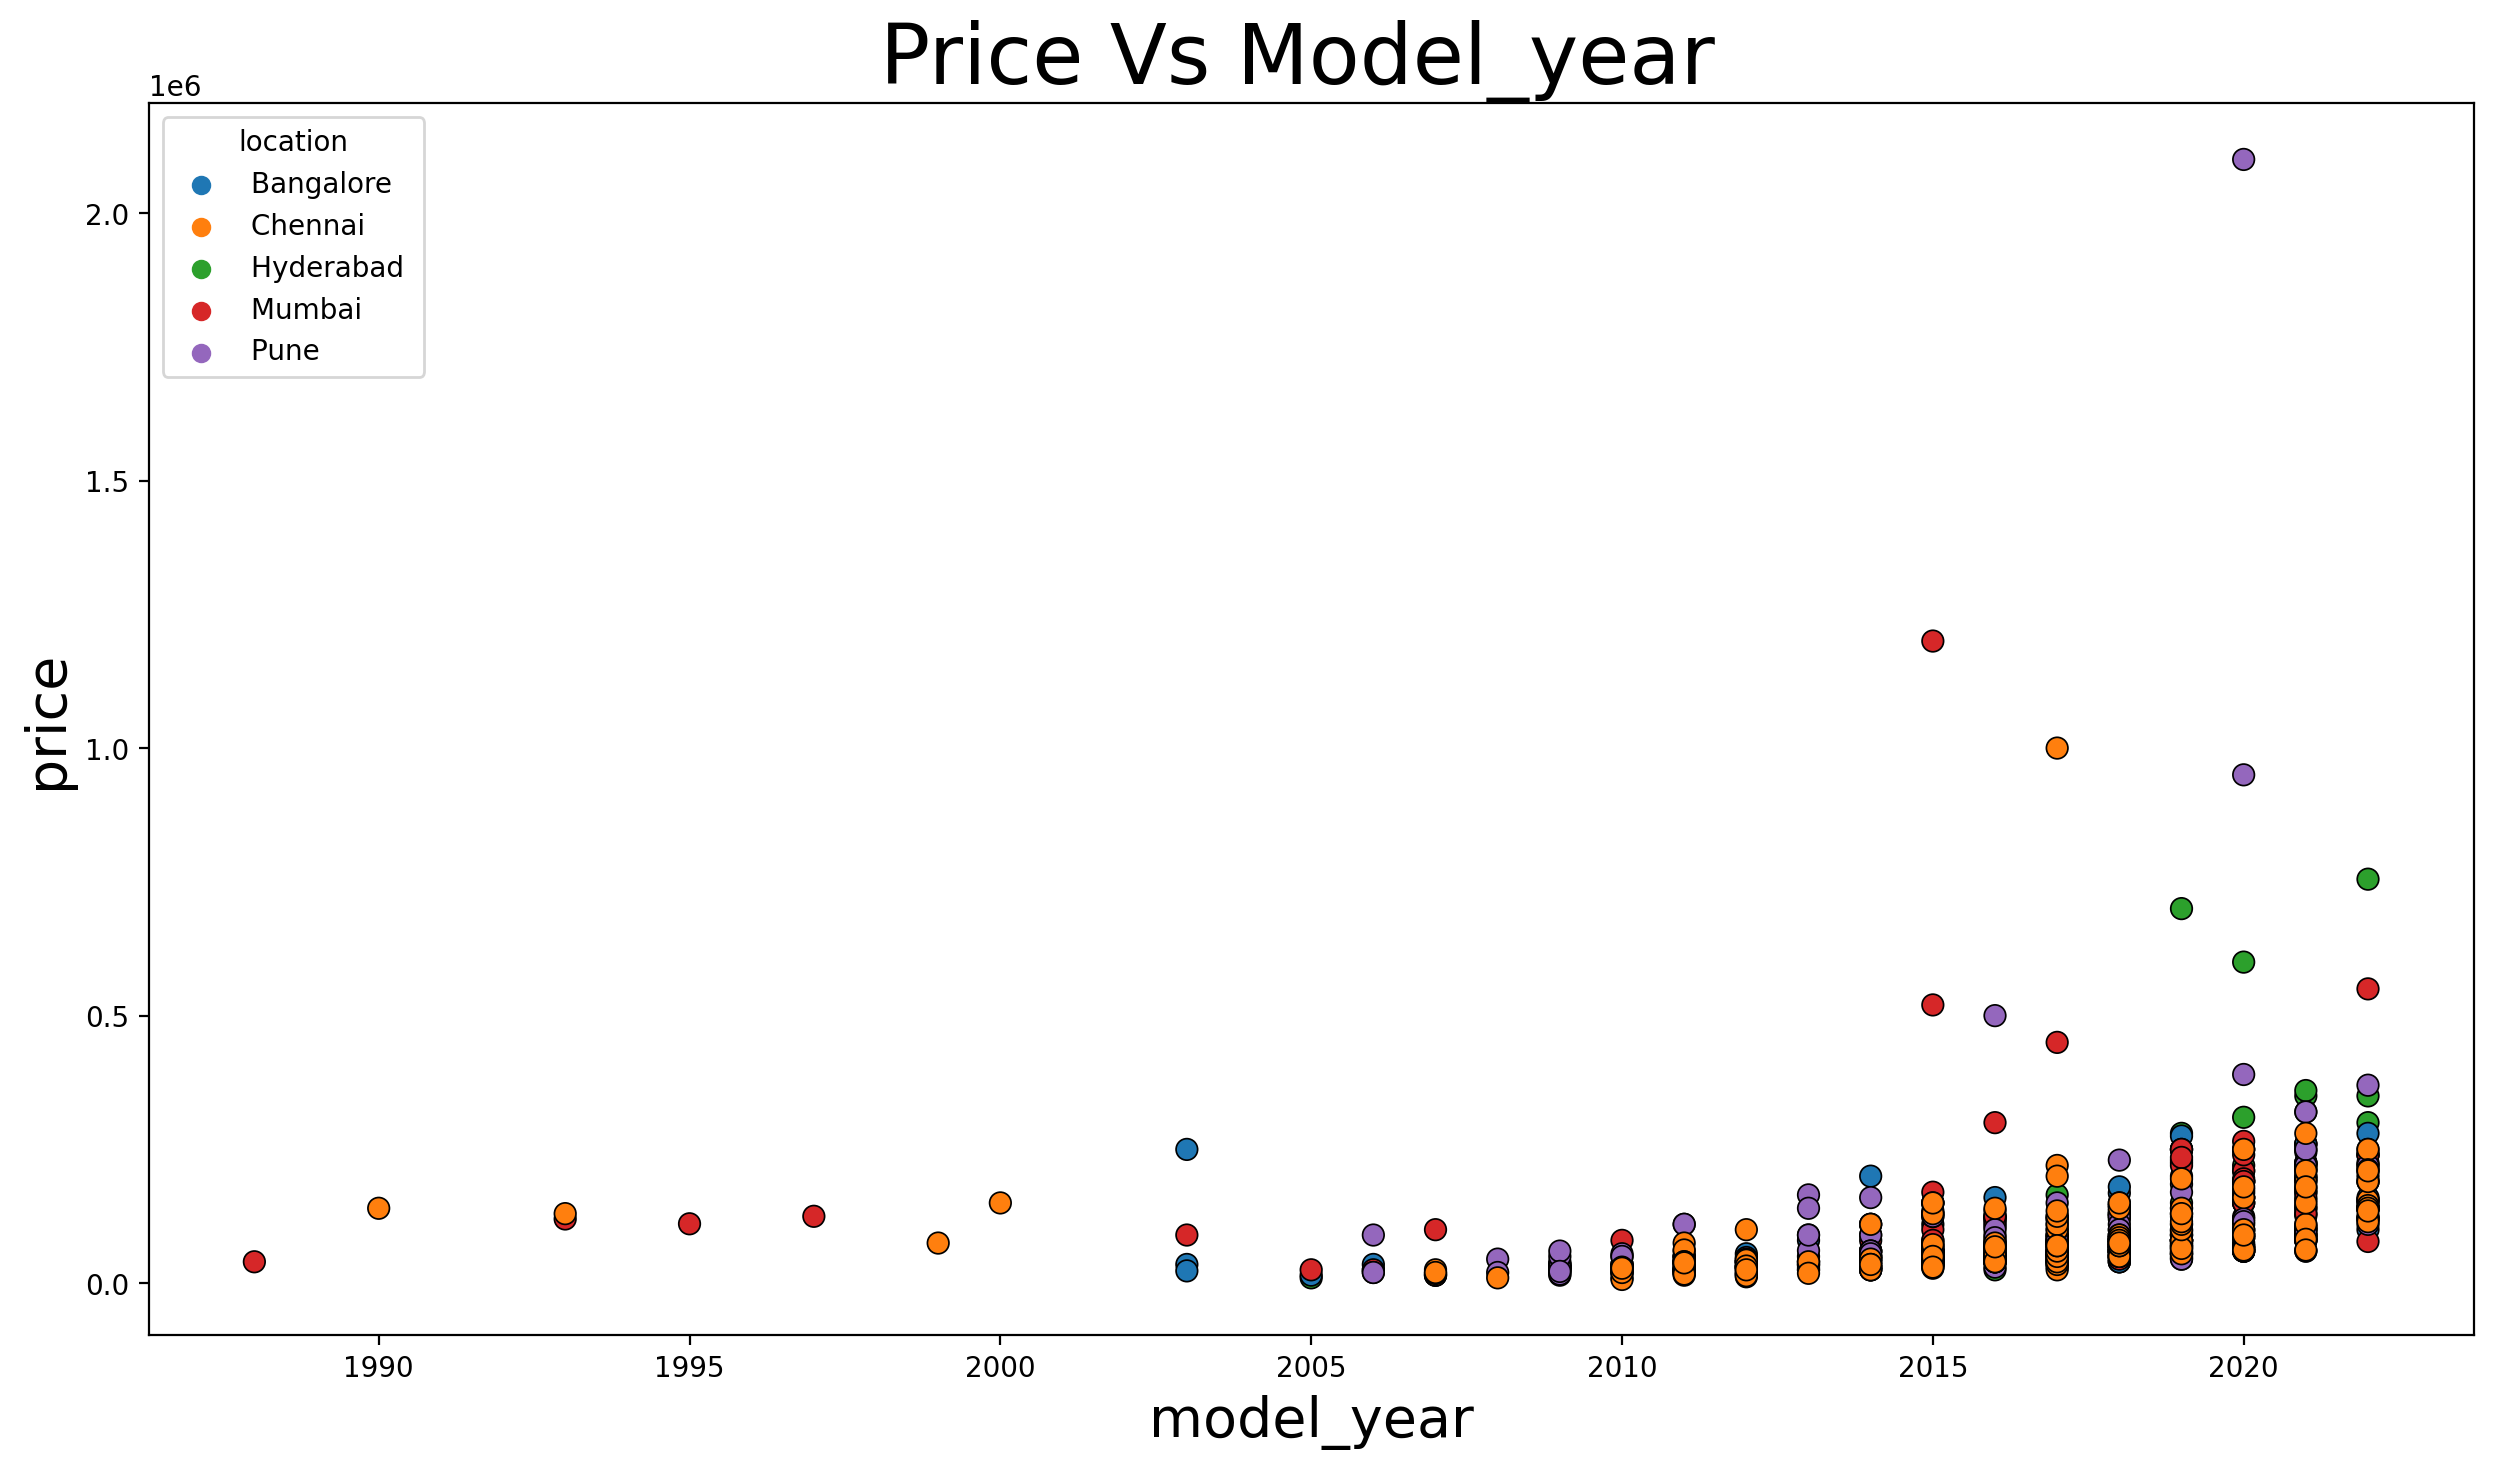

In [101]:
# Model year VS Price (Multi-variate)

plt.figure(figsize=(15,8))
sns.scatterplot(y = 'price' , x ='model_year',hue = 'location', markers = "^",data = bike_cleaned, edgecolor ="black", s = 60 )
plt.title('Price Vs Model_year ', fontsize = 30, color = 'black')
plt.xlabel('model_year',fontsize = 20, color = 'black')
plt.ylabel('price',fontsize = 20, color = 'black');

In [106]:
bike_cleaned

,brand,sub_brand,model_year,owner,kms_driven,price,location
0,Suzuki,Access,2020,1,8500,70000,Hyderabad
1,Bajaj,Pulsar,2020,2,23000,85000,Hyderabad
2,Bajaj,Pulsar,2020,2,23000,85000,Hyderabad
3,Yamaha,Fascino,2016,1,70000,25000,Hyderabad
4,Hero,Splendor,2016,1,30000,50000,Hyderabad
...,...,...,...,...,...,...,...
682,Bajaj,Pulsar,2017,1,30000,70000,Chennai
683,Hero,Pleasure,2013,1,56760,18500,Chennai
684,Hero,Honda,2007,2,60000,20000,Chennai
685,Yamaha,Fazer,2011,1,30000,38000,Chennai


In [117]:
bike_cleaned.head(688)

,brand,sub_brand,model_year,owner,kms_driven,price,location
0,Suzuki,Access,2020,1,8500,70000,Hyderabad
1,Bajaj,Pulsar,2020,2,23000,85000,Hyderabad
2,Bajaj,Pulsar,2020,2,23000,85000,Hyderabad
3,Yamaha,Fascino,2016,1,70000,25000,Hyderabad
4,Hero,Splendor,2016,1,30000,50000,Hyderabad
...,...,...,...,...,...,...,...
682,Bajaj,Pulsar,2017,1,30000,70000,Chennai
683,Hero,Pleasure,2013,1,56760,18500,Chennai
684,Hero,Honda,2007,2,60000,20000,Chennai
685,Yamaha,Fazer,2011,1,30000,38000,Chennai
